In [726]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [727]:
listings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/listings.csv")
listings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/listings0.csv")

num_columns_listings0 = listings0_df.shape[1]
num_columns_listings = listings_df.shape[1]

print(f"Αριθμος στηλων στο listings0.csv: {num_columns_listings0}")
print(f"Αριθμος στηλων στο listings.csv: {num_columns_listings}")

Αριθμος στηλων στο listings0.csv: 16
Αριθμος στηλων στο listings.csv: 106


<ipython-input-727-b3d1c17a248a>:1: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/listings.csv")


In [728]:
duplicates_in_listings0 = listings0_df[listings0_df.duplicated('id', keep=False)]
duplicates_in_listings = listings_df[listings_df.duplicated('id', keep=False)]

if not duplicates_in_listings0.empty:
    print(f"There are duplicate rows based on 'id' in listings0.csv: {duplicates_in_listings0}")
else:
    print("No duplicate rows based on 'id' in listings0.csv.")

if not duplicates_in_listings.empty:
    print(f"There are duplicate rows based on 'id' in listings.csv: {duplicates_in_listings}")
else:
    print("No duplicate rows based on 'id' in listings.csv.")

No duplicate rows based on 'id' in listings0.csv.
No duplicate rows based on 'id' in listings.csv.


In [729]:
combined_listing = pd.merge(listings0_df, listings_df, on='id', how='outer')

print(f"Number of columns in the combined DataFrame: {combined_listing.shape[1]}")
print(combined_listing.head())

Number of columns in the combined DataFrame: 121
      id                               name_x  host_id_x host_name_x  \
0  10595  96m2, 3BR, 2BA, Metro, WI-FI etc...      37177   Emmanouil   
1  10988   75m2, 2-br, metro, wi-fi, cable TV      37177   Emmanouil   
2  10990    50m2, Metro, WI-FI, cableTV, more      37177   Emmanouil   
3  10993  Studio, metro, cable tv, wi-fi, etc      37177   Emmanouil   
4  10995  47m2, close to metro,cable TV,wi-fi      37177   Emmanouil   

   neighbourhood_group neighbourhood_x  latitude_x  longitude_x  \
0                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98888     23.76431   
1                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98843     23.76345   
2                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98783     23.76479   
3                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98861     23.76422   
4                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98950     23.76356   

       room_type_x  price_x  ...  instant_bookable  is_business_travel_ready  \
0  Entire home/apt       73  ...   

In [730]:
columns_matched_and_dropped = []

# Διαγράφω τις στήλες όπου για κάθε γραμμή _x ισούται με _
for column in listings0_df.columns:
    if column in listings_df.columns and column != 'id':
        if combined_listing[column + '_x'].equals(combined_listing[column + '_y']):
            # θεωρώ ότι κρατάω το _x
            combined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:

            pass

for column in columns_matched_and_dropped:
    combined_listing.rename(columns={column + '_x': column}, inplace=True)

print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)
print(combined_listing.head())

Columns where '_x' was the same as '_y' and '_y' was dropped: ['host_id', 'host_name', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
      id                               name_x  host_id  host_name  \
0  10595  96m2, 3BR, 2BA, Metro, WI-FI etc...    37177  Emmanouil   
1  10988   75m2, 2-br, metro, wi-fi, cable TV    37177  Emmanouil   
2  10990    50m2, Metro, WI-FI, cableTV, more    37177  Emmanouil   
3  10993  Studio, metro, cable tv, wi-fi, etc    37177  Emmanouil   
4  10995  47m2, close to metro,cable TV,wi-fi    37177  Emmanouil   

   neighbourhood_group neighbourhood_x  latitude  longitude        room_type  \
0                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76431  Entire home/apt   
1                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ  37.98843   23.76345  Entire home/apt   
2                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ  37.98783   23.76479  Entire home/apt   
3          

In [731]:
remaining_x_columns = [col for col in combined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in combined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)
#Και σε αυτά διαγ΄ραφω τις στήλες ****_y και κραταω τις x όπου * είναι wild  character
combined_listing.drop('neighbourhood' + '_y', axis=1, inplace=True)
combined_listing.drop('price' + '_y', axis=1, inplace=True)
combined_listing.drop('name' + '_y', axis=1, inplace=True)
combined_listing.rename(columns={'neighbourhood' + '_x': 'neighbourhood'}, inplace=True)
combined_listing.rename(columns={'price' + '_x': 'price'}, inplace=True)
combined_listing.rename(columns={'name' + '_x': 'name'}, inplace=True)


combined_listing.shape
columns_to_keep = [
    'id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
    'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id'
]


selected_columns_df = combined_listing[columns_to_keep].copy()

# Εκτυπώνω τις πρώτες γραμμές για να δω αν εχουν γινει ολα καλα.
print(selected_columns_df.head())

Remaining '_x' columns: ['name_x', 'neighbourhood_x', 'price_x']
Remaining '_y' columns: ['name_y', 'neighbourhood_y', 'price_y']
      id zipcode  \
0  10595   11526   
1  10988   11526   
2  10990   11526   
3  10993  115 26   
4  10995   11526   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [732]:
#Τα του φεβρουαρίου τα προηγούμενα 'ηταν για τον Απρίλη
flistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/listings.csv")
flistings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/listings0.csv")
fcombined_listing = pd.merge(flistings0_df, flistings_df, on='id', how='outer')

print(f"Number of columns in the combined DataFrame: {fcombined_listing.shape[1]}")
print(fcombined_listing.head())
columns_matched_and_dropped = []

# Ακριβως τα ιδια με πριν
for column in flistings0_df.columns:
    if column in flistings_df.columns and column != 'id':
        if fcombined_listing[column + '_x'].equals(fcombined_listing[column + '_y']):
            fcombined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:
            pass

for column in columns_matched_and_dropped:
    fcombined_listing.rename(columns={column + '_x': column}, inplace=True)


print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)
print(fcombined_listing.head())
remaining_x_columns = [col for col in fcombined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in fcombined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)
different_names_df = fcombined_listing[fcombined_listing['name_x'] != fcombined_listing['name_y']]
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

if not different_names_df.empty:
    print("Rows where 'name_x' and 'name_y' are different:")
    for index, row in different_names_df.iterrows():
        print(f"Row {index}:'{row['name_x']}' | name_y = '{row['name_y']}'")
else:
    print("There are no rows where 'name_x' and 'name_y' are different.")
fcombined_listing.drop('name' + '_y', axis=1, inplace=True)
fcombined_listing.drop('neighbourhood' + '_y', axis=1, inplace=True)
fcombined_listing.drop('price' + '_y', axis=1, inplace=True)
fcombined_listing.rename(columns={'neighbourhood' + '_x': 'neighbourhood'}, inplace=True)
fcombined_listing.rename(columns={'price' + '_x': 'price'}, inplace=True)
fcombined_listing.rename(columns={'name' + '_x': 'name'}, inplace=True)
fcombined_listing.shape
columns_to_keep = [
    'id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
    'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights'
]


fselected_columns_df = fcombined_listing[columns_to_keep].copy()

print(fselected_columns_df.head())

<ipython-input-732-31e7a0762673>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  flistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/listings.csv")


Number of columns in the combined DataFrame: 121
      id                               name_x  host_id_x host_name_x  \
0  10595  96m2, 3BR, 2BA, Metro, WI-FI etc...      37177   Emmanouil   
1  10988   75m2, 2-br, metro, wi-fi, cable TV      37177   Emmanouil   
2  10990    50m2, Metro, WI-FI, cableTV, more      37177   Emmanouil   
3  10993  Studio, metro, cable tv, wi-fi, etc      37177   Emmanouil   
4  10995  47m2, close to metro,cable TV,wi-fi      37177   Emmanouil   

   neighbourhood_group neighbourhood_x  latitude_x  longitude_x  \
0                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ   37.988879    23.764315   
1                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ   37.988434    23.763447   
2                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ   37.987834    23.764787   
3                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ   37.988607    23.764222   
4                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ   37.989498    23.763562   

       room_type_x  price_x  ...  instant_bookable  is_business_travel_ready  \
0  Entire home/apt       71  ...   

In [733]:
#Τα του μαρτίου
mlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/listings.csv")
mlistings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/listings0.csv")
mcombined_listing = pd.merge(mlistings0_df, mlistings_df, on='id', how='outer')
print(f"Number of columns in the combined DataFrame: {mcombined_listing.shape[1]}")
print(mcombined_listing.head())
columns_matched_and_dropped = []


for column in mlistings0_df.columns:
    if column in mlistings_df.columns and column != 'id':
        if mcombined_listing[column + '_x'].equals(mcombined_listing[column + '_y']):
            mcombined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:

            pass

for column in columns_matched_and_dropped:
    mcombined_listing.rename(columns={column + '_x': column}, inplace=True)

print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)
print(mcombined_listing.head())
remaining_x_columns = [col for col in mcombined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in mcombined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)
different_names_df = mcombined_listing[mcombined_listing['name_x'] != mcombined_listing['name_y']]
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
if not different_names_df.empty:
    print("Rows where 'name_x' and 'name_y' are different:")
    for index, row in different_names_df.iterrows():
        print(f"Row {index}:'{row['name_x']}' | name_y = '{row['name_y']}'")
else:
    print("There are no rows where 'name_x' and 'name_y' are different.")
mcombined_listing.drop('name' + '_y', axis=1, inplace=True)
mcombined_listing.drop('neighbourhood' + '_y', axis=1, inplace=True)
mcombined_listing.drop('price' + '_y', axis=1, inplace=True)
mcombined_listing.rename(columns={'neighbourhood' + '_x': 'neighbourhood'}, inplace=True)
mcombined_listing.rename(columns={'price' + '_x': 'price'}, inplace=True)
mcombined_listing.rename(columns={'name' + '_x': 'name'}, inplace=True)
mcombined_listing.shape
columns_to_keep = [
    'id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
    'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights'
]


mselected_columns_df = mcombined_listing[columns_to_keep].copy()


print(mselected_columns_df.head())

<ipython-input-733-678cca2617c0>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  mlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/listings.csv")


Number of columns in the combined DataFrame: 121
      id                               name_x  host_id_x host_name_x  \
0  10595  96m2, 3BR, 2BA, Metro, WI-FI etc...      37177   Emmanouil   
1  10988   75m2, 2-br, metro, wi-fi, cable TV      37177   Emmanouil   
2  10990    50m2, Metro, WI-FI, cableTV, more      37177   Emmanouil   
3  10993  Studio, metro, cable tv, wi-fi, etc      37177   Emmanouil   
4  10995  47m2, close to metro,cable TV,wi-fi      37177   Emmanouil   

   neighbourhood_group neighbourhood_x  latitude_x  longitude_x  \
0                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98888     23.76431   
1                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98843     23.76345   
2                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98783     23.76479   
3                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98861     23.76422   
4                  NaN     ΑΜΠΕΛΟΚΗΠΟΙ    37.98950     23.76356   

       room_type_x  price_x  ...  instant_bookable  is_business_travel_ready  \
0  Entire home/apt       72  ...   

In [734]:
print(selected_columns_df.shape)
print(fselected_columns_df.shape)
print(mselected_columns_df.shape)

(9661, 31)
(9100, 30)
(9361, 30)


In [735]:

ids_selected = set(selected_columns_df['id'])
ids_fselected = set(fselected_columns_df['id'])
ids_mselected = set(mselected_columns_df['id'])


unique_to_selected = ids_selected - ids_fselected - ids_mselected
unique_to_fselected = ids_fselected - ids_selected - ids_mselected
unique_to_mselected = ids_mselected - ids_selected - ids_fselected

print(f"IDs unique to selected_columns_df: {len(unique_to_selected)}")
print(f"IDs unique to fselected_columns_df: {len(unique_to_fselected)}")
print(f"IDs unique to mselected_columns_df: {len(unique_to_mselected)}")


common_ids = ids_selected & ids_fselected & ids_mselected


print(f"IDs that exist in all DataFrames: {common_ids}")
print(f"Number of IDs common to all DataFrames: {len(common_ids)}")


common_ids1 = ids_selected & ids_fselected - common_ids


print(f"IDs that exist in all APRIL & FEB: {common_ids}")
print(f"Number of IDs : {len(common_ids1)}")


common_ids2 = ids_selected & ids_mselected - common_ids

print(f"IDs that exist in APRIL MARCH: {common_ids}")
print(f"Number of IDs: {len(common_ids2)}")

common_ids3 = ids_fselected & ids_mselected - common_ids


print(f"IDs that exist in FEB AND MARCH: {common_ids}")
print(f"Number of IDs: {len(common_ids3)}")


IDs unique to selected_columns_df: 669
IDs unique to fselected_columns_df: 333
IDs unique to mselected_columns_df: 74
IDs that exist in all DataFrames: {27426816, 22478850, 17629191, 27361304, 25755682, 22577187, 29425703, 27623473, 22872116, 11403317, 28639286, 720953, 131133, 24150080, 11731014, 20349011, 16318550, 25755745, 10354786, 22052963, 11403364, 30081136, 25460849, 22347893, 1572984, 14090362, 27295874, 26345609, 30441615, 9502865, 24019089, 19071125, 23888025, 3866788, 23429284, 20316331, 28934315, 22380717, 6881456, 23560375, 18907321, 13729980, 1245373, 21495999, 10682561, 21496005, 20218055, 13992137, 11010251, 15827156, 12419291, 22348012, 19202286, 17531132, 27328770, 16253187, 31490310, 31949062, 1900810, 23822602, 18710798, 24936729, 29851930, 18055452, 21791005, 18710818, 18153771, 25985325, 29786418, 31555895, 11141442, 29327682, 29196613, 6652232, 30802251, 25362768, 13304153, 23953756, 24150366, 20152674, 688483, 23888232, 8913269, 18547065, 31555963, 27820414, 7

In [736]:
merged_df = selected_columns_df.merge(fselected_columns_df, on='id', how='outer')
merged_df = merged_df.merge(mselected_columns_df, on='id', how='outer')

In [737]:
import pandas as pd


columns_x = [col for col in merged_df.columns if col.endswith('_x') and col!='number_of_reviews_x']

columns_y = [col for col in merged_df.columns if col.endswith('_y') and col!='number_of_reviews']

print("Columns ending with '_x':", columns_x)
print("Columns ending with '_y':", columns_y)

print(len(columns_x))
print(len(columns_y))


Columns ending with '_x': ['zipcode_x', 'transit_x', 'bedrooms_x', 'beds_x', 'review_scores_rating_x', 'neighbourhood_x', 'name_x', 'latitude_x', 'longitude_x', 'last_review_x', 'instant_bookable_x', 'host_since_x', 'host_response_rate_x', 'host_identity_verified_x', 'host_has_profile_pic_x', 'first_review_x', 'description_x', 'city_x', 'cancellation_policy_x', 'bed_type_x', 'bathrooms_x', 'accommodates_x', 'amenities_x', 'room_type_x', 'property_type_x', 'price_x', 'availability_365_x', 'minimum_nights_x']
Columns ending with '_y': ['zipcode_y', 'transit_y', 'bedrooms_y', 'beds_y', 'review_scores_rating_y', 'number_of_reviews_y', 'neighbourhood_y', 'name_y', 'latitude_y', 'longitude_y', 'last_review_y', 'instant_bookable_y', 'host_since_y', 'host_response_rate_y', 'host_identity_verified_y', 'host_has_profile_pic_y', 'first_review_y', 'description_y', 'city_y', 'cancellation_policy_y', 'bed_type_y', 'bathrooms_y', 'accommodates_y', 'amenities_y', 'room_type_y', 'property_type_y', 'pri

In [738]:
merged_df['month'] = merged_df['id'].apply(
    lambda x: 'AFM' if x in common_ids else
              'AF' if x in common_ids1 else
              'AM' if x in common_ids2 else
              'FM' if x in common_ids3 else
              'A' if x in unique_to_selected else
              'F' if x in unique_to_fselected else
              'M' if x in unique_to_mselected else
              None
)


In [739]:
merged_df['month'].value_counts()

month
AFM    8428
A       669
AM      542
F       333
FM      317
M        74
AF       22
Name: count, dtype: int64

In [740]:
def standardize_zipcode(row):
    if pd.isna(row['zipcode']):
        if pd.notna(row['zipcode_x']):
            return row['zipcode_x']
        elif pd.notna(row['zipcode_y']):
            return row['zipcode_y']
    return row['zipcode']

def recent_zipcode(row):
    if not pd.isna(row['zipcode']) and not pd.isna(row['zipcode_x']):
        return row['zipcode_x']
    if not pd.isna(row['zipcode']) and pd.isna(row['zipcode_x']) and not pd.isna(row['zipcode_y']):
        return row['zipcode_y']
    return row['zipcode']

merged_df['zipcode'] = merged_df.apply(standardize_zipcode, axis=1)
merged_df['zipcode'] = merged_df.apply(recent_zipcode, axis=1)

In [741]:
import numpy as np

def func(df, name_of_column):
    column_x = name_of_column + '_x'
    column_y = name_of_column + '_y'

    condition_x = df[name_of_column].isna() & df[column_x].notna()
    condition_y = df[name_of_column].isna() & df[column_y].notna()

    df[name_of_column] = np.where(condition_x, df[column_x], df[name_of_column])
    df[name_of_column] = np.where(condition_y, df[column_y], df[name_of_column])

    df[name_of_column] = np.where(df[column_x].notna(), df[column_x], df[name_of_column])

    df[name_of_column] = np.where(df[column_x].isna() & df[column_y].notna(), df[column_y], df[name_of_column])

    return df

def compute_new_price_april(row):
    if row['id'] in unique_to_fselected:
        return row['price_x']
    elif row['id'] in common_ids:
        return row['price_x']
    elif row['id'] in common_ids1:
        return row['price_x']
    elif row['id'] in common_ids3:
        return row['price_x']
    else:
        return None

def compute_new_price_feb(row):
    if row['id'] in unique_to_mselected:
        return row['price_y']
    elif row['id'] in common_ids:
        return row['price_y']
    elif row['id'] in common_ids2:
        return row['price_y']
    elif row['id'] in common_ids3:
        return row['price_y']
    else:
        return None

def compute_new_price_march(row):
    if row['id'] in unique_to_selected:
        return row['price']
    elif row['id'] in common_ids:
        return row['price']
    elif row['id'] in common_ids1:
        return row['price']
    elif row['id'] in common_ids2:
        return row['price']
    else:
        return None

def computer_nor(row):
  return row['number_of_reviews'] + row['number_of_reviews_x'] + row['number_of_reviews_y']

merged_df['new_price_feb'] = merged_df.apply(compute_new_price_feb, axis=1)
merged_df['new_price_march'] = merged_df.apply(compute_new_price_march, axis=1)
merged_df['new_price_april'] = merged_df.apply(compute_new_price_april, axis=1)
merged_df['number_of_reviews'] = merged_df.apply(computer_nor, axis=1)
# print(fselected_columns_df['price'].head())
# print(merged_df['new_price_feb'].head())
# print(merged_df['price_x'].head())
merged_df.drop('number_of_reviews' + '_x', axis=1, inplace=True)
merged_df.drop('number_of_reviews' + '_y', axis=1, inplace=True)
columns = [col[:-2] for col in columns_x]
for col in columns:
    merged_df = func(merged_df, col)
    merged_df.drop(col + '_x', axis=1, inplace=True)
    merged_df.drop(col + '_y', axis=1, inplace=True)

In [742]:
merged_df['month'].value_counts()

month
AFM    8428
A       669
AM      542
F       333
FM      317
M        74
AF       22
Name: count, dtype: int64

In [743]:
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()


print("Columns with NaN values:")
for col in columns_with_nan:
    print(col)

Columns with NaN values:
host_id
zipcode
transit
bedrooms
beds
review_scores_rating
number_of_reviews
name
last_review
host_response_rate
first_review
description
city
new_price_feb
new_price_march
new_price_april


Στο προηγούμενο βήμα κρατάω τις τιμές του Απρίλη στις κοινές στήλες καθώς είναι οι πιο πρόσφατες αλλιώς αν είναι ΝΑΝ ο Απρίλης κρατάω του Μάρτη αλλιώς αν και ο Μάρτιος είναι ΝΑΝ του Φεβρουαρίου. Στο επόμενο βήμα καθώς οι γραμμές που έχουν ΝΑΝ είναι αρκετές και θα χανόταν το 50% της πληροφορίας αν απλά τις έκανα drop κάνω fill τις τιμές. Γενικά είθισται αν τα πεδία ακολουθούν την κανονική κατανομή να γεμίζουμε τα ΝΑΝ πεδία με την μέση τιμή αλλά κάνοντας το ιστόγραμμα των κατανομών δεν βρήκα κάποιο πεδίο να ακολουθεί την κανονική κατανομή για αυτό τα γέμισα τα πεδία που δέχονται αριθμητικές τιμές εκτός από τον Τ.Κ με τον διάμεσο.

In [744]:
bedrooms_median = merged_df['bedrooms'].median()
beds_median = merged_df['beds'].median()
rsr= merged_df['review_scores_rating'].median()
merged_df['bedrooms'].fillna(bedrooms_median, inplace=True)
merged_df['beds'].fillna(beds_median, inplace=True)
merged_df['review_scores_rating'].fillna(rsr, inplace=True)
merged_df['bedrooms'] = merged_df['bedrooms'].astype(int)
merged_df['beds'] = merged_df['beds'].astype(int)

Καθώς το συγκεκριμένο πεδίο είναι string πρέπει πρώτα να αφαιρέσω το % και ύστερα να κάνω την ίδια διαδικασία με πάνω

In [745]:
merged_df['host_response_rate'] = merged_df['host_response_rate'].str.rstrip('%').astype(float)
merged_df['host_response_rate'].median()

100.0

In [746]:
response_rate_median = merged_df['host_response_rate'].median()
merged_df['host_response_rate'].fillna(response_rate_median, inplace=True)
merged_df['host_response_rate'] = merged_df['host_response_rate'].astype(int).astype(str) + '%'

In [747]:
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()
print("Columns with NaN values:")
for col in columns_with_nan:
    print(col)


Columns with NaN values:
host_id
zipcode
transit
number_of_reviews
name
last_review
first_review
description
city
new_price_feb
new_price_march
new_price_april


Εδώ απλά φτιάχνω ενδεικτικούς ΤΚ που δεν είναι ρεαλιστικοί απλά για να γεμίσω τα ΝΑΝ επίσης επέλεξα να είναι unique απλά για να μην μπλέξω με το να έχω διαφορετικές περιοχές να έχουν το ίδιο ΤΚ

In [748]:
def generate_unique_zipcodes(df, num_to_generate):
    existing_zipcodes = df['zipcode'].dropna().unique()

    new_zipcodes = set()
    while len(new_zipcodes) < num_to_generate:
        new_zipcode = np.random.randint(10000, 99999)
        if new_zipcode not in existing_zipcodes:
            new_zipcodes.add(new_zipcode)

    return list(new_zipcodes)


num_nan = merged_df['zipcode'].isna().sum()
unique_zipcodes = generate_unique_zipcodes(merged_df, num_nan)
merged_df.loc[merged_df['zipcode'].isna(), 'zipcode'] = unique_zipcodes

Βάζω στις κενές περιγραφές ότι δεν υπάρχει διαθέσιμη περιγραφή και το ίδιο για το transit

In [749]:
merged_df.shape
merged_df['description'].fillna("There is no description available", inplace=True)
merged_df['name'].fillna("Listing", inplace=True)
cleaned = merged_df.dropna()
merged_df['transit'].fillna("There is no information about transit available", inplace=True)
cleaned = merged_df.dropna()

In [750]:
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()


print("Columns with NaN values:")
for col in columns_with_nan:
    print(col)


Columns with NaN values:
host_id
number_of_reviews
last_review
first_review
city
new_price_feb
new_price_march
new_price_april


In [751]:
merged_df['city'].fillna("Athens", inplace=True)
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()


print("Columns with NaN values:")
for col in columns_with_nan:
    print(col)


Columns with NaN values:
host_id
number_of_reviews
last_review
first_review
new_price_feb
new_price_march
new_price_april


In [752]:
cleaned = merged_df.dropna()
cleaned.shape
merged_df.shape[0] - cleaned.shape[0]

3541

In [753]:
merged_df['first_review'].fillna("No reviews are found atm", inplace=True)
merged_df['last_review'].fillna("No reviews are found atm", inplace=True)
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()


for col in columns_with_nan:
    print(col)


host_id
number_of_reviews
new_price_feb
new_price_march
new_price_april


In [754]:
cleaned = merged_df.dropna()
cleaned.shape
merged_df.shape[0] - cleaned.shape[0]

1957

In [755]:
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()
for col in columns_with_nan:
    print(col)
merged_df =  merged_df.dropna(subset=['host_id'])
merged_df.shape

host_id
number_of_reviews
new_price_feb
new_price_march
new_price_april


(9661, 35)

Εκανα drop καθως οι πληροφοριες που χανονται ειναι αμελητεες σε σχεση με τον ογκο των δεδομενων και παρκάτω κάνω drop πολύ ακραίες τιμές και κανονικοποιώ τις υπόλοιπες Χ-μ/σ

In [756]:
top_20_biggest = merged_df.nlargest(40, ['bedrooms', 'bathrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates'])
columns_of_interest = ['bedrooms', 'bathrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates']

for column in columns_of_interest:
    top_20_values = merged_df.nlargest(40, column)[column].values
    print(f"Top 20 values for {column}: {top_20_values}")
print(merged_df.shape)
merged_df = merged_df.drop(merged_df[merged_df['minimum_nights'] > 115].index)
merged_df = merged_df.drop(merged_df[merged_df['accommodates'] > 15].index)
print(merged_df.shape)
column_types = merged_df.dtypes
print(column_types)
columns_of_interest = ['bedrooms', 'bathrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates']

for column in columns_of_interest:
    top_20_values = merged_df.nlargest(40, column)[column].values
    print(f"Top 20 values for {column}: {top_20_values}")


Top 20 values for bedrooms: [14 10 10 10 10  7  7  7  7  7  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5]
Top 20 values for bathrooms: [10.   9.5  9.   6.5  6.   5.5  5.5  5.5  5.5  5.   5.   5.   5.   5.
  5.   5.   5.   5.   4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.   4.   4.
  4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4. ]
Top 20 values for beds: [23 20 20 17 16 16 16 16 16 16 16 16 16 15 15 15 15 14 14 14 14 14 14 14
 14 14 13 13 12 12 12 12 12 12 12 12 11 11 11 11]
Top 20 values for price: [7000. 7000. 7000. 7000. 2500. 1500. 1000.  810.  800.  800.  700.  700.
  666.  640.  600.  600.  600.  600.  600.  548.  540.  525.  501.  500.
  500.  500.  500.  500.  500.  500.  500.  500.  500.  500.  495.  490.
  487.  485.  460.  450.]
Top 20 values for minimum_nights: [1000. 1000.  700.  450.  444.  399.  365.  345.  290.  222.  182.  180.
  120.  120.  120.  120.  120.  120.  120.  120.  120.  120.  120.  120.
  120.  120.  120.  1

In [757]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['bedrooms', 'beds',
                        'bathrooms', 'availability_365', 'minimum_nights']


integer_columns = ['bathrooms', 'beds', 'bedrooms', 'minimum_nights']
scaler = StandardScaler()

merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])

merged_df[integer_columns] = merged_df[integer_columns].round(0).astype('int64')


In [758]:
columns_of_interest = ['bedrooms', 'bathrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates']

for column in columns_of_interest:
    top_20_values = merged_df.nlargest(20, column)[column].values
    print(f"Top 20 values for {column}: {top_20_values}")

Top 20 values for bedrooms: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4]
Top 20 values for bathrooms: [19 10 10  9  9  9  9  9  9  8  8  8  8  8  6  6  6  6  6  6]
Top 20 values for beds: [15  9  9  9  8  8  8  8  7  7  7  6  6  5  5  5  5  5  5  5]
Top 20 values for price: [7000. 7000. 7000. 7000. 2500.  800.  700.  700.  666.  640.  600.  600.
  600.  600.  600.  540.  525.  501.  500.  500.]
Top 20 values for minimum_nights: [34 27 27 19 18 18 18 18 18 15 13 12 10  9  9  9  8  8  8  8]
Top 20 values for number_of_reviews: [1856. 1809. 1515. 1404. 1401. 1385. 1383. 1285. 1266. 1264. 1234. 1194.
 1185. 1130. 1087. 1085. 1077. 1071. 1061. 1053.]
Top 20 values for availability_365: [1.17840121 1.17840121 1.17840121 1.17840121 1.17840121 1.17840121
 1.17840121 1.17840121 1.17840121 1.17840121 1.17840121 1.17840121
 1.17840121 1.17840121 1.17840121 1.17840121 1.17840121 1.17840121
 1.17840121 1.17840121]
Top 20 values for accommodates: [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.

 # 1ο ερώτημα
**1.1 Ποιός είναι ο πιο συχνός τύπος room_type για τα δεδομένα σας;**

Όπως φαίνεται και από την πίτα ο πιο συχνός τύπος είναι το 'Entire home apt'

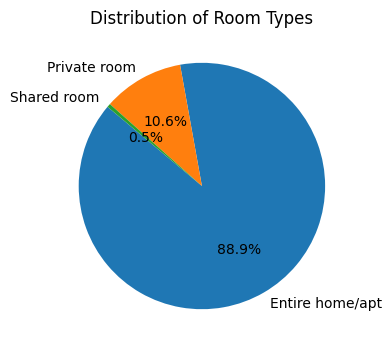

Ο πιο συχνός τύπος δωματίου είναι: Entire home/apt


In [759]:
room_type_counts = merged_df['room_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.show()

room_type_max = merged_df['room_type'].value_counts().idxmax()
print("Ο πιο συχνός τύπος δωματίου είναι:", room_type_max)

# 2ο ερώτημα

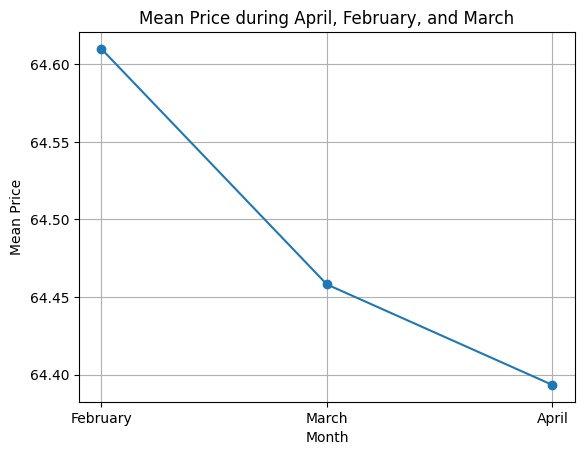

In [760]:
mean_new_price_feb = merged_df['new_price_feb'].mean()
mean_new_price_march = merged_df['new_price_march'].mean()
mean_new_price_april = merged_df['new_price_april'].mean()

mean_prices = pd.DataFrame({
    'Month': ['February', 'March','April', ],
    'Mean Price': [mean_new_price_feb, mean_new_price_march,mean_new_price_april]
})

plt.plot(mean_prices['Month'], mean_prices['Mean Price'], marker='o')
plt.title('Mean Price during April, February, and March')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

 # 3ο ερώτημα
1.3 Ποιές είναι οι 5 πρώτες γειτονιές με τις περισσότερες κριτικές;


Top 5 neighbourhoods with the most reviews:
neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              161181.0
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  87243.0
ΝΕΟΣ ΚΟΣΜΟΣ                          66508.0
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             57958.0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     47264.0
Name: number_of_reviews, dtype: float64


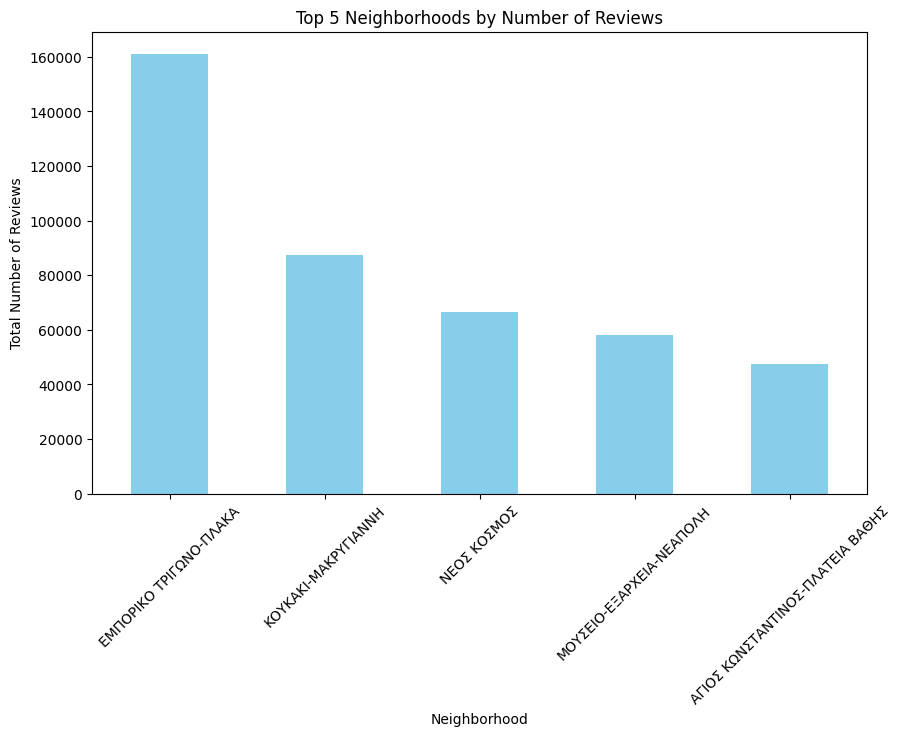

In [761]:
top_neighbourhoods = merged_df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(5)
print("Top 5 neighbourhoods with the most reviews:")
print(top_neighbourhoods)
plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighborhoods by Number of Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()


 # 4ο ερώτημα
**1.4 Ποιά είναι η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων; **

In [762]:

most_frequent_neighbourhood = merged_df['neighbourhood'].value_counts().idxmax()
most_frequent_neighbourhood_count = merged_df['neighbourhood'].value_counts().max()

print("Η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων:", most_frequent_neighbourhood, "με", most_frequent_neighbourhood_count, "καταχωρήσεις.")


Η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων: ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ με 1448 καταχωρήσεις.


# 5ο ερώτημα στο eclass δόθηκε η οδηγία ότι δεν χρειάζεται να κάνουμε και το 6ο ερώτημα εφόσον είναι η ίδια πληροφορία

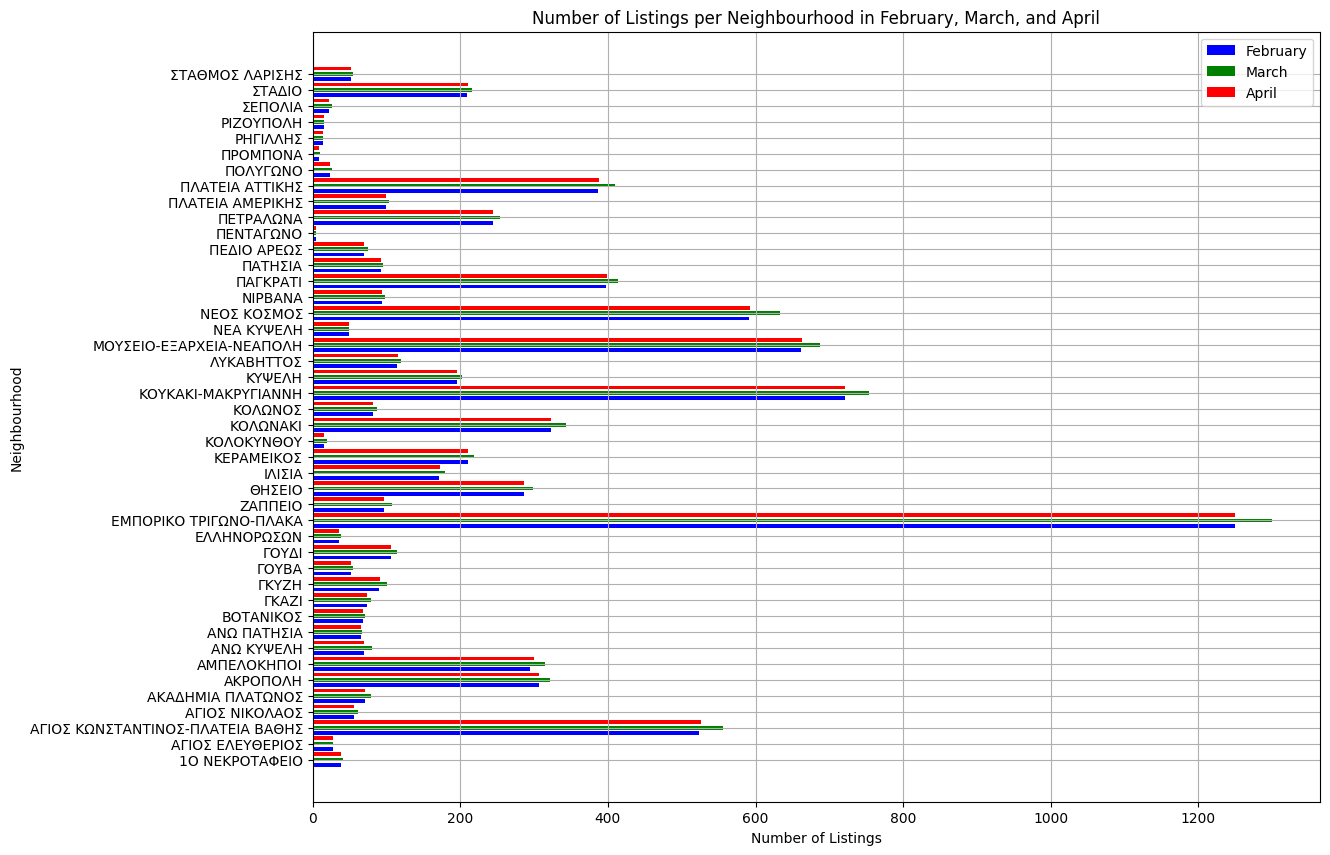

In [763]:
import pandas as pd
import matplotlib.pyplot as plt

april_counts = merged_df[merged_df['new_price_april'].notna()].groupby('neighbourhood').size()
march_counts = merged_df[merged_df['new_price_march'].notna()].groupby('neighbourhood').size()
february_counts = merged_df[merged_df['new_price_feb'].notna()].groupby('neighbourhood').size()

counts_df = pd.DataFrame({
    'April': april_counts,
    'March': march_counts,
    'February': february_counts
})

counts_df.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(13, 10))
neighbourhoods = counts_df.index
bar_width = 0.70

indices = np.arange(len(neighbourhoods))
february_indices = indices * 3
march_indices = february_indices + 1
april_indices = february_indices + 2
ax.barh(february_indices, counts_df['February'], height=bar_width, color='b', label='February')
ax.barh(march_indices, counts_df['March'], height=bar_width, color='g', label='March')
ax.barh(april_indices, counts_df['April'], height=bar_width, color='r', label='April')
ax.set(yticks=february_indices + 1, yticklabels=neighbourhoods, xlabel='Number of Listings', ylabel='Neighbourhood')
ax.set_title('Number of Listings per Neighbourhood in February, March, and April')
ax.legend()

plt.grid(True)
plt.show()

 # 7ο ερώτημα
**1.7 Ποιος είναι ο πιο συχνός τύπος δωματίου (room_type) σε κάθε γειτονιά
(neighborhood); **

In [764]:
most_common_room = merged_df.groupby('neighbourhood')['room_type'].agg(lambda x: x.value_counts().index[0])
print("Ο πιο συχνος τύπος δωματίου σε κάθε γειτονιά είναι \n",most_common_room)

Ο πιο συχνος τύπος δωματίου σε κάθε γειτονιά είναι 
 neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Entire home/apt
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    Entire home/apt
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    Entire home/apt
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      Entire home/apt
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   Entire home/apt
ΑΚΡΟΠΟΛΗ                            Entire home/apt
ΑΜΠΕΛΟΚΗΠΟΙ                         Entire home/apt
ΑΝΩ ΚΥΨΕΛΗ                          Entire home/apt
ΑΝΩ ΠΑΤΗΣΙΑ                         Entire home/apt
ΒΟΤΑΝΙΚΟΣ                           Entire home/apt
ΓΚΑΖΙ                               Entire home/apt
ΓΚΥΖΗ                               Entire home/apt
ΓΟΥΒΑ                               Entire home/apt
ΓΟΥΔΙ                               Entire home/apt
ΕΛΛΗΝΟΡΩΣΩΝ                         Entire home/apt
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Entire home/apt
ΖΑΠΠΕΙΟ                             Entire home/apt
ΘΗΣΕΙΟ                              Entire home/a

 # 8ο ερώτημα
**1.8 Ποιός είναι ο πιο ακριβός τύπος δωματίου; **

In [765]:
mean_price_per_room_type = merged_df.groupby('room_type')['price'].mean()


room_type_highest_mean_price = mean_price_per_room_type.idxmax()
highest_mean_price = mean_price_per_room_type.max()

print(f"Ο πιο ακριβός τύπος δωματίου είναι ο  {room_type_highest_mean_price} με μέση τιμή {highest_mean_price}.")

Ο πιο ακριβός τύπος δωματίου είναι ο  Private room με μέση τιμή 85.20874751491054.


 # 9ο ερώτημα
**1.9 FOLIUM**
Αποθηκεύω τον χάρτη σε html γιατί αλλιώς κολλάει ολόκληρο το notebook...

In [766]:
!pip install folium

In [767]:
import folium


latitude = merged_df['latitude'].mean()
longitude = merged_df['longitude'].mean()
my_map = folium.Map(location=[latitude, longitude], zoom_start=100)

for idx, row in merged_df.iterrows():

    popup_text = f"<br>Transit: {row['transit']}"
    popup = folium.Popup(popup_text, parse_html=True)

    folium.Marker([row['latitude'], row['longitude']], popup=popup).add_to(my_map)

my_map.save('map.html')


 # 10ο ερώτημα
**1.10 WORDCLOUD**

In [768]:
!pip install wordcloud

In [769]:
areviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/april/reviews.csv")
reviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/febrouary/reviews.csv")
mreviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2019/march/reviews.csv")
areviews_df.drop('id', axis=1, inplace=True)
reviews_df.drop('id', axis=1, inplace=True)
mreviews_df.drop('id', axis=1, inplace=True)
aggregated_reviews = reviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')
merged_df.drop('listing_id', axis=1, inplace=True)
print(merged_df.head())

aggregated_reviews = mreviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')
merged_df.drop('listing_id', axis=1, inplace=True)

aggregated_reviews = areviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')

merged_df.drop('listing_id', axis=1, inplace=True)


      id  host_id zipcode  \
0  10595  37177.0   11526   
1  10988  37177.0   11526   
2  10990  37177.0   11526   
3  10993  37177.0  115 26   
4  10995  37177.0   11526   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

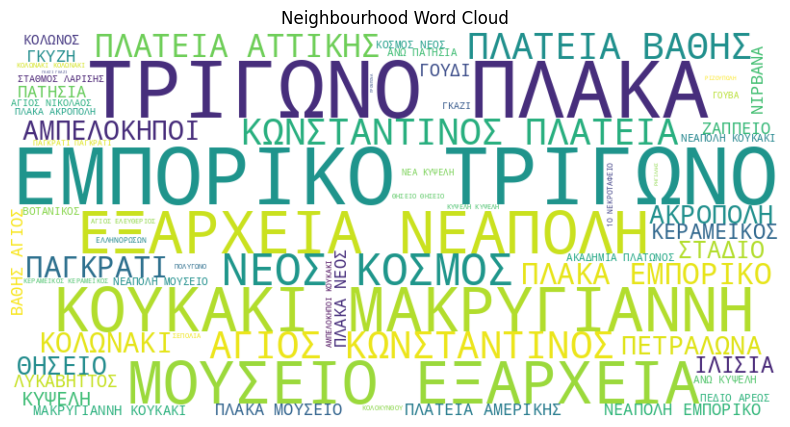

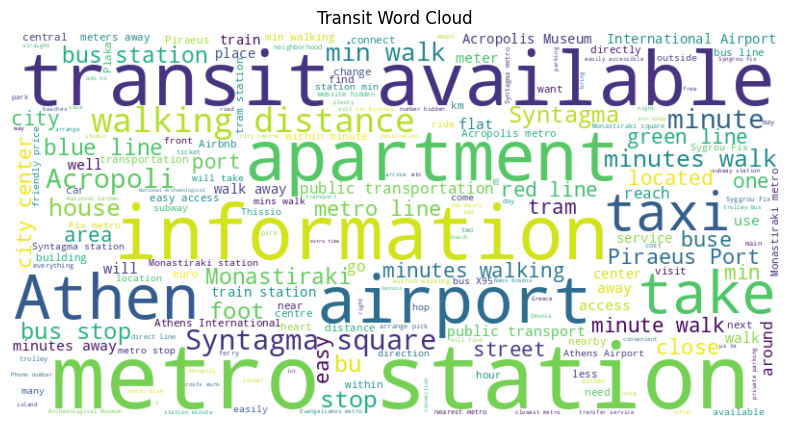

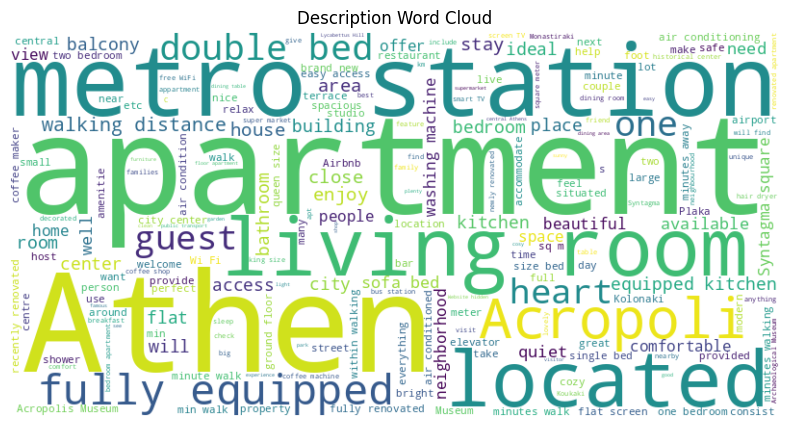

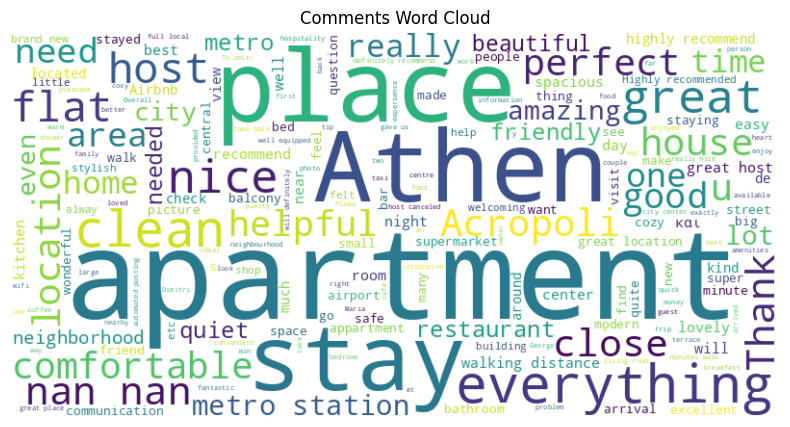

In [770]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(data, title):
    text = ' '.join(str(item) for item in data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(merged_df['neighbourhood'], 'Neighbourhood Word Cloud')
generate_wordcloud(merged_df['transit'], 'Transit Word Cloud')
generate_wordcloud(merged_df['description'], 'Description Word Cloud')
generate_wordcloud(merged_df['comments'], 'Comments Word Cloud')

11ο ερώτημα

In [771]:
import pandas as pd

merged_df['amenities'] = merged_df['amenities'].apply(lambda x: x.strip('{}').split(','))

unique_amenities = set()
merged_df['amenities'].apply(lambda x: unique_amenities.update(x))
# print("Unique Amenities:", unique_amenities)
# print("Unique Amenities:")
for amenity in sorted(unique_amenities):
    print(amenity)



category_dict = {
    'Bathroom' : ['Washer / Dryer','Walk-in shower','Touchless faucets','Toilet paper','Stand alone steam shower','Soaking tub','Shower chair','Rain shower','Roll-in shower','toilet','Alfresco bathtub','Bath towel','Bathroom essentials','Bathtub with bath chair','Body soap','En suite bathroom','Fixed grab bars for shower','Fixed grab bars for toilet','Hair dryer','Handheld shower head','Heated towel rack','Hot tub','Hot water','Jetted tub'],
    'Services' : ['Self check-in','24-hour check-in','Cleaning before checkout','Disabled parking spot','Host greets you'],
    'Accessibility' : ['Wheelchair accessible','Well-lit path to entrance','Step-free access','Accessible-height bed','Accessible-height toilet','Flat path to front door','Ground floor access'],
    'Appliances' : ['Sound system','Smart lock','Air conditioning','Air purifier','Amazon Echo','Ceiling Fan','Central air conditioning','Heat lamps','Ironing Board'],
    'Kids' : ['Baby bath','Baby monitor','Babysitter recommendations','Children’s books and toys','Children’s dinnerware','Family/kid friendly'],
    'Kitchen' : ['Steam oven','BBQ grill','Breakfast table','Changing Table','Coffee maker','Convection oven','Cooking basics','Dishes and silverware','Double oven','Espresso machine','Formal dining area','Full kitchen','Gas oven','Hot water kettle','Mini fridge'],
    'Beach' : ['Beach essentials','Beach view'],
    'Bedroom' : ['Warming drawer','Bed linens','Bedroom comforts','Day bed','Electric profiling bed','Extra pillows and blankets','Firm mattress','Lock on bedroom door','Memory foam mattress','Murphy bed','Outlet covers','Pillow-top mattress'],
    'TV' : ['Cable TV','DVD player','HBO GO','Projector and screen','Smart TV'],
    'Building' : ['Building Staff'],
    'Electronic' : ['Buzzer/wireless intercom','EV charger','Ethernet connection','Fax machine','Game console','High-resolution computer monitor','Laptop friendly workspace','Pocket wifi'],
    'Safety' : ['Smoke detector','Safety card','Carbon monoxide detector','Fire extinguisher','Fire pit','Fireplace guards','First aid kit','Private entrance'],
    'Extras' : ['Table corner guards','Suitable for events','Standing valet','Stair gates','Smoking allowed','Shared gym','Exercise equipment','Heated floors','High chair','Indoor fireplace','Long term stays allowed','Luggage dropoff allowed','Pack ’n Play/travel crib','Private hot tub','Private living room','Private pool','Room-darkening shades'],
    'Parking' : ['Free parking on premises','Free street parking','Outdoor parking','Paid parking off premises','Paid parking on premises'],
    'Outdoors' : ['Sun loungers','Single level home','Garden or backyard','Lake access','Mountain view','Outdoor seating','Patio or balcony'],
    'Pets' : ['Pets allowed','Other pet(s)','Pets live on this property']



}

unique_amenities = set()
for amenities_set in merged_df['amenities']:
    unique_amenities.update(amenities_set)

unique_amenities_df = pd.DataFrame(list(unique_amenities), columns=['Amenity'])


sorted_amenities = sorted(list(unique_amenities))

unique_amenities_df = pd.DataFrame(sorted_amenities, columns=['Amenity'])


print(unique_amenities_df)



 toilet"
"24-hour check-in"
"Accessible-height bed"
"Accessible-height toilet"
"Air conditioning"
"Air purifier"
"Alfresco bathtub"
"Amazon Echo"
"BBQ grill"
"Baby bath"
"Baby monitor"
"Babysitter recommendations"
"Bath towel"
"Bathroom essentials"
"Bathtub with bath chair"
"Beach essentials"
"Beach view"
"Bed linens"
"Bedroom comforts"
"Body soap"
"Breakfast table"
"Building staff"
"Buzzer/wireless intercom"
"Cable TV"
"Carbon monoxide detector"
"Ceiling fan"
"Central air conditioning"
"Changing table"
"Children’s books and toys"
"Children’s dinnerware"
"Cleaning before checkout"
"Coffee maker"
"Convection oven"
"Cooking basics"
"DVD player"
"Day bed"
"Disabled parking spot"
"Dishes and silverware"
"Double oven"
"EV charger"
"Electric profiling bed"
"En suite bathroom"
"Espresso machine"
"Ethernet connection"
"Exercise equipment"
"Extra pillows and blankets"
"Family/kid friendly"
"Fax machine"
"Fire extinguisher"
"Fire pit"
"Fireplace guards"
"Firm mattress"
"First aid kit"
"Fixed gr

In [772]:
df=merged_df
def categorize_amenities(amenities_list, category_dict):
    categories = set()
    # print(amenities_list)
    amenities = [amenity.strip().replace('"', '') for amenity in amenities_list]  # Clean the amenities list
    for amenity in amenities:
        # print(amenity)
        for category, items in category_dict.items():

          # if str(amenity) == str("Pocket wifi"):
            # print("amenity is",amenity,"item",items)
            if amenity in items:
                print(category)
                categories.add(category)
    return list(categories)


df['Categories'] = df['amenities'].apply(lambda x: categorize_amenities(x, category_dict))
df['Categories'].head()

Streaming output truncated to the last 5000 lines.
Extras
Extras
Accessibility
Accessibility
Accessibility
Accessibility
Accessibility
Bathroom
Accessibility
Services
Bathroom
Appliances
Pets
Safety
Bathroom
Electronic
TV
Appliances
Parking
Parking
Bathroom
Safety
Safety
Safety
Bedroom
Bathroom
Electronic
Services
Safety
Extras
Bathroom
Bedroom
Bedroom
Electronic
Electronic
Kitchen
Kitchen
Kitchen
Electronic
Outdoors
Extras
Appliances
Pets
Parking
Safety
Safety
Safety
Safety
Bathroom
Electronic
Safety
Kitchen
Kitchen
Kitchen
Outdoors
Extras
Extras
Accessibility
Accessibility
Accessibility
Accessibility
Appliances
Safety
Safety
Safety
Bathroom
Electronic
Safety
Bathroom
Bedroom
Bedroom
Kitchen
Kitchen
Kitchen
Outdoors
Outdoors
Services
Appliances
Bathroom
Electronic
Safety
Appliances
Bathroom
Electronic
Appliances
Parking
Safety
Safety
Bathroom
Bathroom
Bedroom
Kitchen
Kitchen
Kitchen
Outdoors
Outdoors
Extras
Accessibility
Accessibility
Accessibility
Accessibility
Services
Bathroom
Appl

0    [Bathroom, Appliances, Extras, Electronic, Bedroom, Kids, Kitchen, Services, Outdoors, Safety, TV]
1    [Bathroom, Appliances, Extras, Electronic, Bedroom, Kids, Kitchen, Services, Outdoors, Safety, TV]
2    [Bathroom, Appliances, Extras, Electronic, Bedroom, Kids, Kitchen, Services, Outdoors, Safety, TV]
3    [Bathroom, Appliances, Extras, Electronic, Bedroom, Kids, Kitchen, Services, Outdoors, Safety, TV]
4                                        [Bathroom, Appliances, Electronic, Kids, Services, Safety, TV]
Name: Categories, dtype: object

In [773]:
unique_amenities1 = set()
merged_df['Categories'].apply(lambda x: unique_amenities1.update(x))
# print("Unique Amenities:", unique_amenities)
# print("Unique Amenities:")
for amenity in sorted(unique_amenities1):
    print(amenity)

Accessibility
Appliances
Bathroom
Beach
Bedroom
Electronic
Extras
Kids
Kitchen
Outdoors
Parking
Pets
Safety
Services
TV


In [774]:
df = merged_df

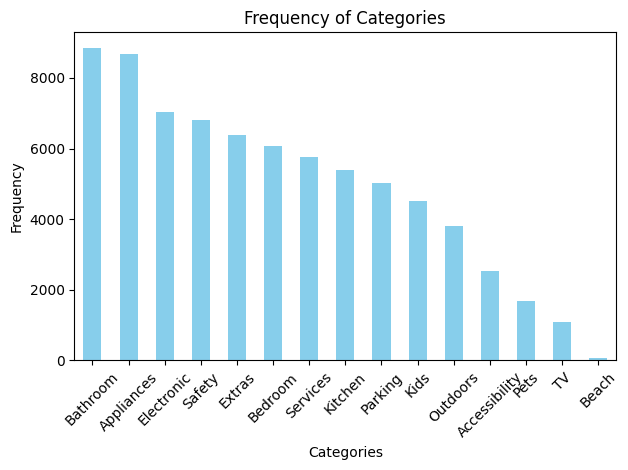

In [775]:
df = merged_df


all_categories = [category for sublist in df['Categories'] for category in sublist]
category_counts = pd.Series(all_categories).value_counts()


category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.12 ερώτημα

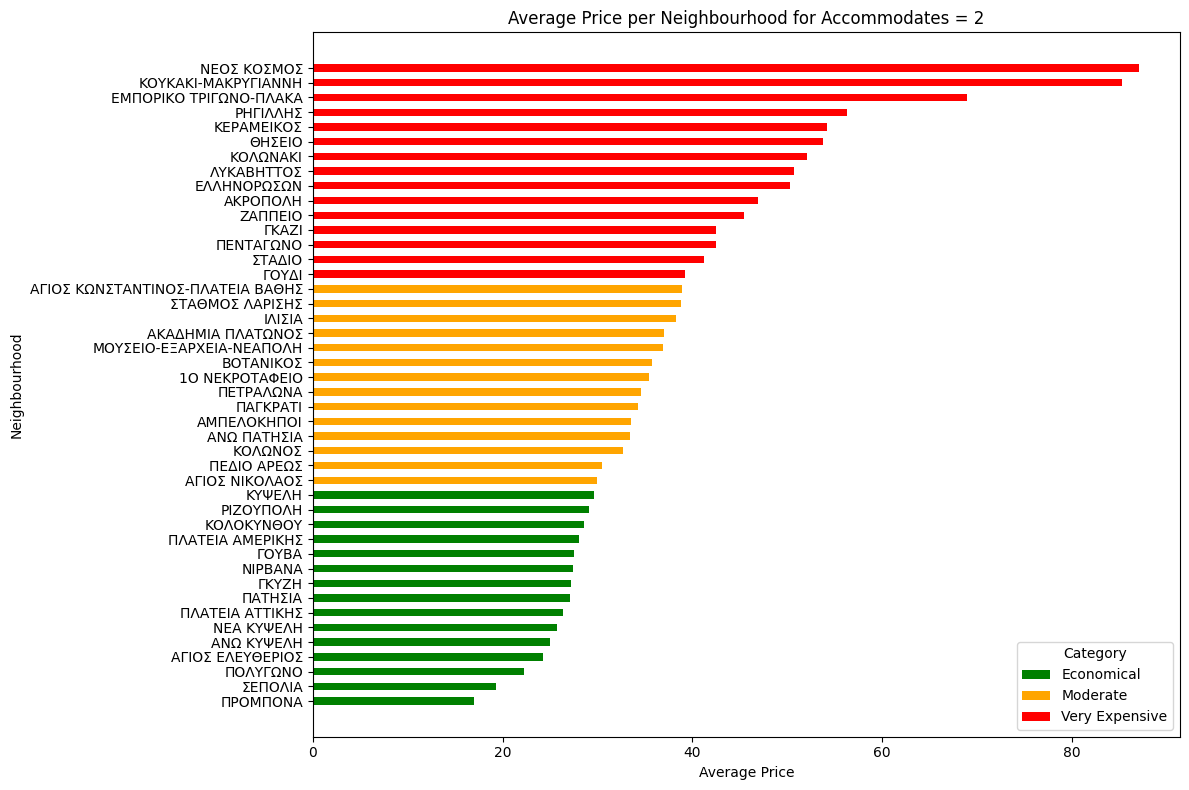

In [776]:
filtered_df = df[df['accommodates'] == 2]


mean_prices = filtered_df.groupby('neighbourhood')['price'].mean().reset_index()


sorted_neighbourhoods = mean_prices.sort_values(by='price', ascending=True)


sorted_neighbourhoods['category'] = pd.qcut(sorted_neighbourhoods['price'], 3, labels=['Economical', 'Moderate', 'Very Expensive'])


color_map = {'Very Expensive': 'red', 'Moderate': 'orange', 'Economical': 'green'}
sorted_neighbourhoods['color'] = sorted_neighbourhoods['category'].map(color_map)


plt.figure(figsize=(12, 8))
bar_height = 0.5
space_between_bars = 0.3

for index, row in enumerate(sorted_neighbourhoods.itertuples(), 1):
    plt.barh(index, row.price, height=bar_height, color=row.color, label=row.category if row.category not in plt.gca().get_legend_handles_labels()[1] else "")

plt.yticks(range(1, len(sorted_neighbourhoods) + 1), sorted_neighbourhoods['neighbourhood'])
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.title('Average Price per Neighbourhood for Accommodates = 2')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# 1.13 ΕΡΩΤΗΜΑ ΤΑΞΙΝΟΜΗΣΗ ΤΩΝ 5 ΚΑΛΥΤΕΡΩΝ ΓΕΙΤΟΝΙΩΝ ΑΝΑΦΟΡΙΚΑ ΜΕ ΤΗ ΒΑΘΜΟΛΟΓΙΑ

In [777]:
top_5_neighborhoods = merged_df.groupby('neighbourhood')['review_scores_rating'].mean().nlargest(5)
print(top_5_neighborhoods)


neighbourhood
ΚΟΛΟΚΥΝΘΟΥ     98.500000
ΠΡΟΜΠΟΝΑ       98.100000
ΣΕΠΟΛΙΑ        98.000000
ΓΚΥΖΗ          97.859813
ΕΛΛΗΝΟΡΩΣΩΝ    97.707317
Name: review_scores_rating, dtype: float64


# ΕΡΩΤΗΜΑ ΓΕΙΤΟΝΙΕΣ ΠΙΟ ΚΟΝΤΑ ΣΤΟ ΑΕΡΟΔΡΟΜΙΟ

In [778]:
from geopy.distance import geodesic


airport_coords = (37.9362, 23.9481)
df['distance'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), airport_coords).kilometers, axis=1)


sorted_df = df.sort_values(by='distance')


closest_listings = sorted_df.head(10)


for i, row in closest_listings.iterrows():
    print(f"{i + 1}. {row['neighbourhood']} - Distance: {row['distance']:.2f} km")

9245. ΠΕΝΤΑΓΩΝΟ - Distance: 15.68 km
6933. ΠΕΝΤΑΓΩΝΟ - Distance: 15.97 km
2212. ΓΟΥΔΙ - Distance: 16.22 km
7136. ΠΕΝΤΑΓΩΝΟ - Distance: 16.24 km
1732. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.32 km
316. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.36 km
6319. ΠΕΝΤΑΓΩΝΟ - Distance: 16.37 km
1791. ΠΕΝΤΑΓΩΝΟ - Distance: 16.38 km
382. ΠΕΝΤΑΓΩΝΟ - Distance: 16.40 km
8256. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.41 km


# ΕΥΡΕΣΗ ΤΙΜΩΝ ΓΕΙΤΟΝΙΩΝ ΠΟΥ ΕΙΝΑΙ ΠΙΟ ΚΟΝΤΑ ΣΤΗΝ ΑΚΡΟΠΟΛΗ

In [779]:
from geopy.distance import geodesic


airport_coords = (37.9715, 23.7257)
df = merged_df.copy()
df = df[df['accommodates'] == 2]
df['distance'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), airport_coords).kilometers, axis=1)


sorted_df = df.sort_values(by='distance')

closest_listings = sorted_df.head(10)


for i, row in closest_listings.iterrows():
    print(f"{i + 1}. {row['price']} {row['neighbourhood']} - Distance: {row['distance']:.2f} km")


5573. 100.0 ΑΚΡΟΠΟΛΗ - Distance: 0.18 km
1065. 70.0 ΑΚΡΟΠΟΛΗ - Distance: 0.29 km
8560. 65.0 ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ - Distance: 0.30 km
9501. 90.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.31 km
5354. 70.0 ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ - Distance: 0.31 km
872. 55.0 ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ - Distance: 0.33 km
852. 47.0 ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ - Distance: 0.36 km
9054. 37.0 ΑΚΡΟΠΟΛΗ - Distance: 0.36 km
5488. 70.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.36 km
8700. 85.0 ΑΚΡΟΠΟΛΗ - Distance: 0.36 km


#14o ερώτημα

In [780]:
host_listings_count = merged_df['host_id'].value_counts()

df = pd.DataFrame({'host_id': host_listings_count.index, 'num_host_listings': host_listings_count.values})


df = df.sort_values(by='num_host_listings', ascending=False)

top_10_hosts = df.head(10)

print(top_10_hosts)

       host_id  num_host_listings
0   29927830.0                 85
1  135482892.0                 83
2     748818.0                 76
3    1621474.0                 68
4    1418201.0                 58
5  112527018.0                 57
6    2089542.0                 45
7   65714690.0                 42
8    2718115.0                 41
9   55670751.0                 40


In [781]:
listings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/september/listings.csv")
listings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/september/listings0.csv")
num_columns_listings0 = listings0_df.shape[0]
num_columns_listings = listings_df.shape[0]

print(f"Number of columns in listings0.csv: {num_columns_listings0}")
print(f"Number of columns in listings.csv: {num_columns_listings}")

print(f"Number of columns in listings0.csv: {num_columns_listings0}")
print(f"Number of columns in listings.csv: {num_columns_listings}")

duplicates_in_listings0 = listings0_df[listings0_df.duplicated('id', keep=False)]
duplicates_in_listings = listings_df[listings_df.duplicated('id', keep=False)]

if not duplicates_in_listings0.empty:
    print(f"There are duplicate rows based on 'id' in listings0.csv: {duplicates_in_listings0}")
else:
    print("No duplicate rows based on 'id' in listings0.csv.")

if not duplicates_in_listings.empty:
    print(f"There are duplicate rows based on 'id' in listings.csv: {duplicates_in_listings}")
else:
    print("No duplicate rows based on 'id' in listings.csv.")


combined_listing = pd.merge(listings0_df, listings_df, on='id', how='outer')

print(f"Number of columns in the combined DataFrame: {combined_listing.shape[1]}")
# print(combined_listing.head())


columns_matched_and_dropped = []

# Διαγράφω τις στήλες όπου για κάθε γραμμή _x ισούται με _
for column in listings0_df.columns:
    if column in listings_df.columns and column != 'id':
        if combined_listing[column + '_x'].equals(combined_listing[column + '_y']):
            # θεωρώ ότι κρατάω το _x
            combined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:

            pass

for column in columns_matched_and_dropped:
    combined_listing.rename(columns={column + '_x': column}, inplace=True)

print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)


remaining_x_columns = [col for col in combined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in combined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)


columns_x = [col for col in combined_listing.columns if col.endswith('_x')]

for col_x in columns_x:
    col_y = col_x[:-2] + '_y'

    combined_listing[col_x] = combined_listing.apply(
        lambda row: row[col_y] if pd.isna(row[col_x]) and not pd.isna(row[col_y]) else row[col_x],
        axis=1
    )



combined_listing.drop(columns=[col[:-2] + '_y' for col in columns_x], inplace=True)
combined_listing.columns = [col.replace('_x', '') if col.endswith('_x') else col for col in combined_listing.columns]

Number of columns in listings0.csv: 12345
Number of columns in listings.csv: 12955
Number of columns in listings0.csv: 12345
Number of columns in listings.csv: 12955
No duplicate rows based on 'id' in listings0.csv.
No duplicate rows based on 'id' in listings.csv.
Number of columns in the combined DataFrame: 92
Columns where '_x' was the same as '_y' and '_y' was dropped: []
Remaining '_x' columns: ['name_x', 'host_id_x', 'host_name_x', 'neighbourhood_x', 'latitude_x', 'longitude_x', 'room_type_x', 'price_x', 'minimum_nights_x', 'number_of_reviews_x', 'last_review_x', 'reviews_per_month_x', 'calculated_host_listings_count_x', 'availability_365_x', 'number_of_reviews_ltm_x', 'license_x']
Remaining '_y' columns: ['name_y', 'host_id_y', 'host_name_y', 'neighbourhood_y', 'latitude_y', 'longitude_y', 'room_type_y', 'price_y', 'minimum_nights_y', 'availability_365_y', 'number_of_reviews_y', 'number_of_reviews_ltm_y', 'last_review_y', 'license_y', 'calculated_host_listings_count_y', 'reviews_

In [782]:
columns_to_keep = [
    'id', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
     'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id'
]


selected_columns_df = combined_listing[columns_to_keep].copy()
selected_columns_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

In [783]:
mlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/march/listings.csv")
mlistings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/march/listings0.csv")
duplicates_in_listings0 = mlistings0_df[mlistings0_df.duplicated('id', keep=False)]
duplicates_in_listings = mlistings_df[mlistings_df.duplicated('id', keep=False)]

if not duplicates_in_listings0.empty:
    print(f"There are duplicate rows based on 'id' in listings0.csv: {duplicates_in_listings0}")
else:
    print("No duplicate rows based on 'id' in listings0.csv.")

if not duplicates_in_listings.empty:
    print(f"There are duplicate rows based on 'id' in listings.csv: {duplicates_in_listings}")
else:
    print("No duplicate rows based on 'id' in listings.csv.")


combined_listing = pd.merge(mlistings0_df, mlistings_df, on='id', how='outer')

print(f"Number of columns in the combined DataFrame: {combined_listing.shape[1]}")
# print(combined_listing.head())

columns_matched_and_dropped = []

# Διαγράφω τις στήλες όπου για κάθε γραμμή _x ισούται με _
for column in mlistings0_df.columns:
    if column in mlistings_df.columns and column != 'id':
        if combined_listing[column + '_x'].equals(combined_listing[column + '_y']):

            # θεωρώ ότι κρατάω το _x
            combined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:

            pass

for column in columns_matched_and_dropped:
    combined_listing.rename(columns={column + '_x': column}, inplace=True)

print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)

remaining_x_columns = [col for col in combined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in combined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)


columns_x = [col for col in combined_listing.columns if col.endswith('_x')]


for col_x in columns_x:
    col_y = col_x[:-2] + '_y'

    combined_listing[col_x] = combined_listing.apply(
        lambda row: row[col_y] if pd.isna(row[col_x]) and not pd.isna(row[col_y]) else row[col_x],
        axis=1
    )



combined_listing.drop(columns=[col[:-2] + '_y' for col in columns_x], inplace=True)
combined_listing.columns = [col.replace('_x', '') if col.endswith('_x') else col for col in combined_listing.columns]


columns_to_keep = [
    'id', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
     'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id'
]
mselected_columns_df = combined_listing[columns_to_keep].copy()
mselected_columns_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)


No duplicate rows based on 'id' in listings0.csv.
No duplicate rows based on 'id' in listings.csv.
Number of columns in the combined DataFrame: 92
Columns where '_x' was the same as '_y' and '_y' was dropped: ['host_id', 'host_name', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
Remaining '_x' columns: ['name_x', 'neighbourhood_x', 'price_x']
Remaining '_y' columns: ['name_y', 'neighbourhood_y', 'price_y']


In [784]:
jlistings_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/june/listings.csv")
jlistings0_df = pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/june/listings0.csv")
duplicates_in_listings0 = jlistings0_df[jlistings0_df.duplicated('id', keep=False)]
duplicates_in_listings = jlistings_df[jlistings_df.duplicated('id', keep=False)]

if not duplicates_in_listings0.empty:
    print(f"There are duplicate rows based on 'id' in listings0.csv: {duplicates_in_listings0}")
else:
    print("No duplicate rows based on 'id' in listings0.csv.")

if not duplicates_in_listings.empty:
    print(f"There are duplicate rows based on 'id' in listings.csv: {duplicates_in_listings}")
else:
    print("No duplicate rows based on 'id' in listings.csv.")



combined_listing = pd.merge(jlistings0_df, jlistings_df, on='id', how='outer')

print(f"Number of columns in the combined DataFrame: {combined_listing.shape[1]}")


columns_matched_and_dropped = []

# Διαγράφω τις στήλες όπου για κάθε γραμμή _x ισούται με _
for column in jlistings0_df.columns:
    if column in jlistings_df.columns and column != 'id':
        if combined_listing[column + '_x'].equals(combined_listing[column + '_y']):
            # θεωρώ ότι κρατάω το _x
            combined_listing.drop(column + '_y', axis=1, inplace=True)
            columns_matched_and_dropped.append(column)
        else:

            pass

for column in columns_matched_and_dropped:
    combined_listing.rename(columns={column + '_x': column}, inplace=True)

print("Columns where '_x' was the same as '_y' and '_y' was dropped:", columns_matched_and_dropped)

remaining_x_columns = [col for col in combined_listing.columns if '_x' in col]
remaining_y_columns = [col for col in combined_listing.columns if '_y' in col]
print("Remaining '_x' columns:", remaining_x_columns)
print("Remaining '_y' columns:", remaining_y_columns)


columns_x = [col for col in combined_listing.columns if col.endswith('_x')]


for col_x in columns_x:
    col_y = col_x[:-2] + '_y'

    combined_listing[col_x] = combined_listing.apply(
        lambda row: row[col_y] if pd.isna(row[col_x]) and not pd.isna(row[col_y]) else row[col_x],
        axis=1
    )



combined_listing.drop(columns=[col[:-2] + '_y' for col in columns_x], inplace=True)
combined_listing.columns = [col.replace('_x', '') if col.endswith('_x') else col for col in combined_listing.columns]


columns_to_keep = [
    'id', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
     'bathrooms', 'accommodates',
    'amenities', 'room_type', 'property_type', 'price', 'availability_365',
    'minimum_nights','host_id'
]


jselected_columns_df = combined_listing[columns_to_keep].copy()
jselected_columns_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)


No duplicate rows based on 'id' in listings0.csv.
No duplicate rows based on 'id' in listings.csv.
Number of columns in the combined DataFrame: 92
Columns where '_x' was the same as '_y' and '_y' was dropped: ['name', 'host_id', 'host_name', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
Remaining '_x' columns: ['neighbourhood_x', 'price_x']
Remaining '_y' columns: ['neighbourhood_y', 'price_y']


In [785]:
fselected_columns_df  = mselected_columns_df
mselected_columns_df = jselected_columns_df


In [786]:
ids_selected = set(selected_columns_df['id'])
ids_fselected = set(fselected_columns_df['id'])
ids_mselected = set(mselected_columns_df['id'])

unique_to_selected = ids_selected - ids_fselected - ids_mselected
unique_to_fselected = ids_fselected - ids_selected - ids_mselected
unique_to_mselected = ids_mselected - ids_selected - ids_fselected

print(f"IDs unique to selected_columns_df: {len(unique_to_selected)}")
print(f"IDs unique to fselected_columns_df: {len(unique_to_fselected)}")
print(f"IDs unique to mselected_columns_df: {len(unique_to_mselected)}")


common_ids = ids_selected & ids_fselected & ids_mselected



print(f"Number of IDs common to all DataFrames: {len(common_ids)}")


common_ids1 = ids_selected & ids_fselected - common_ids


print(f"Number of IDs : {len(common_ids1)}")


common_ids2 = ids_selected & ids_mselected - common_ids

print(f"Number of IDs: {len(common_ids2)}")

common_ids3 = ids_fselected & ids_mselected - common_ids


print(f"Number of IDs: {len(common_ids3)}")


IDs unique to selected_columns_df: 1261
IDs unique to fselected_columns_df: 718
IDs unique to mselected_columns_df: 0
Number of IDs common to all DataFrames: 10609
Number of IDs : 55
Number of IDs: 1736
Number of IDs: 0


In [787]:
df2019 = merged_df

In [788]:
nan_ids_selected = set(selected_columns_df[selected_columns_df['number_of_reviews'].isna()]['id'])
nan_ids_m = set(mselected_columns_df[mselected_columns_df['number_of_reviews'].isna()]['id'])
nan_ids_f = set(fselected_columns_df[fselected_columns_df['number_of_reviews'].isna()]['id'])


nan_ids_all = nan_ids_selected.intersection(nan_ids_m, nan_ids_f)

len(nan_ids_all)

0

In [789]:
merged_df1 = selected_columns_df.merge(fselected_columns_df, on='id', how='outer')
merged_df1 = merged_df1.merge(mselected_columns_df, on='id', how='outer')
merged_df1['number_of_reviews'] = merged_df1[['number_of_reviews', 'number_of_reviews_x', 'number_of_reviews_y']].fillna(0).sum(axis=1)
merged_df1 = merged_df1.drop(columns=['number_of_reviews_x', 'number_of_reviews_y'])

In [790]:
columns_with_nan = merged_df1.columns[merged_df1.isna().any()].tolist()
for col in columns_with_nan:
    print(col)


bedrooms_x
beds_x
review_scores_rating_x
neighbourhood_x
name_x
latitude_x
longitude_x
last_review_x
instant_bookable_x
host_since_x
host_response_rate_x
host_identity_verified_x
host_has_profile_pic_x
first_review_x
description_x
bathrooms_x
accommodates_x
amenities_x
room_type_x
property_type_x
price_x
availability_365_x
minimum_nights_x
host_id_x
bedrooms_y
beds_y
review_scores_rating_y
neighbourhood_y
name_y
latitude_y
longitude_y
last_review_y
instant_bookable_y
host_since_y
host_response_rate_y
host_identity_verified_y
host_has_profile_pic_y
first_review_y
description_y
bathrooms_y
accommodates_y
amenities_y
room_type_y
property_type_y
price_y
availability_365_y
minimum_nights_y
host_id_y
bedrooms
beds
review_scores_rating
neighbourhood
name
latitude
longitude
last_review
instant_bookable
host_since
host_response_rate
host_identity_verified
host_has_profile_pic
first_review
description
bathrooms
accommodates
amenities
room_type
property_type
price
availability_365
minimum_nights


In [791]:
import pandas as pd


columns_x = [col for col in merged_df1.columns if col.endswith('_x')]

columns_y = [col for col in merged_df1.columns if col.endswith('_y')]

print("Columns ending with '_x':", columns_x)
print("Columns ending with '_y':", columns_y)

print(len(columns_x))
print(len(columns_y))

Columns ending with '_x': ['bedrooms_x', 'beds_x', 'review_scores_rating_x', 'neighbourhood_x', 'name_x', 'latitude_x', 'longitude_x', 'last_review_x', 'instant_bookable_x', 'host_since_x', 'host_response_rate_x', 'host_identity_verified_x', 'host_has_profile_pic_x', 'first_review_x', 'description_x', 'bathrooms_x', 'accommodates_x', 'amenities_x', 'room_type_x', 'property_type_x', 'price_x', 'availability_365_x', 'minimum_nights_x', 'host_id_x']
Columns ending with '_y': ['bedrooms_y', 'beds_y', 'review_scores_rating_y', 'neighbourhood_y', 'name_y', 'latitude_y', 'longitude_y', 'last_review_y', 'instant_bookable_y', 'host_since_y', 'host_response_rate_y', 'host_identity_verified_y', 'host_has_profile_pic_y', 'first_review_y', 'description_y', 'bathrooms_y', 'accommodates_y', 'amenities_y', 'room_type_y', 'property_type_y', 'price_y', 'availability_365_y', 'minimum_nights_y', 'host_id_y']
24
24


In [792]:
import numpy as np
merged_df = merged_df1
def func(df, name_of_column):
    column_x = name_of_column + '_x'
    column_y = name_of_column + '_y'


    condition_x = df[name_of_column].isna() & df[column_x].notna()
    condition_y = df[name_of_column].isna() & df[column_y].notna()

    df[name_of_column] = np.where(condition_x, df[column_x], df[name_of_column])
    df[name_of_column] = np.where(condition_y, df[column_y], df[name_of_column])

    df[name_of_column] = np.where(df[column_x].notna(), df[column_x], df[name_of_column])

    df[name_of_column] = np.where(df[column_x].isna() & df[column_y].notna(), df[column_y], df[name_of_column])

    return df

def compute_new_price_april(row):
    if row['id'] in unique_to_fselected:
        return row['price_x']
    elif row['id'] in common_ids:
        return row['price_x']
    elif row['id'] in common_ids1:
        return row['price_x']
    elif row['id'] in common_ids3:
        return row['price_x']
    else:
        return None

def compute_new_price_feb(row):
    if row['id'] in unique_to_mselected:
        return row['price_y']
    elif row['id'] in common_ids:
        return row['price_y']
    elif row['id'] in common_ids2:
        return row['price_y']
    elif row['id'] in common_ids3:
        return row['price_y']
    else:
        return None

def compute_new_price_march(row):
    if row['id'] in unique_to_selected:
        return row['price']
    elif row['id'] in common_ids:
        return row['price']
    elif row['id'] in common_ids1:
        return row['price']
    elif row['id'] in common_ids2:
        return row['price']
    else:
        return None

# def computer_nor(row):
#   return row['number_of_reviews'] + row['number_of_reviews_x'] + row['number_of_reviews_y']
merged_df['price_x'] = merged_df['price_x'].replace('[\$,]', '', regex=True).astype(float)
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)
merged_df['price_y'] = merged_df['price_y'].replace('[\$,]', '', regex=True).astype(float)
merged_df['new_price_feb'] = merged_df.apply(compute_new_price_feb, axis=1)
merged_df['new_price_march'] = merged_df.apply(compute_new_price_march, axis=1)
merged_df['new_price_april'] = merged_df.apply(compute_new_price_april, axis=1)
# merged_df['number_of_reviews'] = merged_df.apply(computer_nor, axis=1)
# # print(fselected_columns_df['price'].head())
# # print(merged_df['new_price_feb'].head())
# # print(merged_df['price_x'].head())
# col = 'number_of_reviews'
# merged_df.drop(col + '_x', axis=1, inplace=True)
# merged_df.drop(col + '_y', axis=1, inplace=True)
columns = [col[:-2] for col in columns_x]
for col in columns:
    merged_df = func(merged_df, col)
    merged_df.drop(col + '_x', axis=1, inplace=True)
    merged_df.drop(col + '_y', axis=1, inplace=True)
merged_df1 = merged_df


In [793]:
# merged_df['new_pr']

In [794]:
bedrooms_median = merged_df1['bedrooms'].median()
beds_median = merged_df1['beds'].median()
rsr= merged_df1['review_scores_rating'].median()
merged_df1['bedrooms'].fillna(bedrooms_median, inplace=True)
merged_df1['beds'].fillna(beds_median, inplace=True)
merged_df1['review_scores_rating'].fillna(rsr, inplace=True)
merged_df1['bedrooms'] = merged_df1['bedrooms'].astype(int)
merged_df1['beds'] = merged_df1['beds'].astype(int)
merged_df1['host_response_rate'] = merged_df1['host_response_rate'].str.rstrip('%').astype(float)
merged_df1['host_response_rate'].median()
response_rate_median = merged_df1['host_response_rate'].median()
merged_df1['host_response_rate'].fillna(response_rate_median, inplace=True)
merged_df1['host_response_rate'] = merged_df1['host_response_rate'].astype(int).astype(str) + '%'
merged_df1['description'].fillna("There is no description available", inplace=True)
merged_df1['name'].fillna("Listing", inplace=True)
merged_df1['bathrooms'].fillna("There is no information on bathrooms available", inplace=True)
merged_df1 = merged_df1.dropna(subset=['host_id'])
merged_df1['price'] = merged_df1['price'].replace('[\$,]', '', regex=True).astype(float)


In [795]:
top_20_biggest = merged_df1.nlargest(40, ['bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates'])
columns_of_interest = ['bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'accommodates']

for column in columns_of_interest:
    top_20_values = merged_df1.nlargest(40, column)[column].values
    print(f"Top 20 values for {column}: {top_20_values}")
merged_df1 = merged_df1.drop(merged_df1[merged_df1['minimum_nights'] >= 90].index)
merged_df1 = merged_df1.drop(merged_df1[merged_df1['accommodates'] >= 15].index)
merged_df1 = merged_df1.drop(merged_df1[merged_df1['price'] >= 957].index)
merged_df1 = merged_df1.drop(merged_df1[merged_df1['bedrooms'] >= 8].index)
merged_df1 = merged_df1.drop(merged_df1[merged_df1['beds'] >=11].index)

Top 20 values for bedrooms: [33 14 12 12 12 11 10 10 10 10  9  8  8  8  8  8  8  8  7  7  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
Top 20 values for beds: [40 30 18 17 16 16 15 14 14 14 14 13 13 13 13 13 13 13 12 12 12 12 12 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10]
Top 20 values for price: [8270. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 7200. 7200. 6000.
 5052. 5000. 5000. 5000. 4625. 2856. 2178. 2000. 1981. 1837. 1826. 1692.
 1506. 1500. 1500. 1414. 1400. 1396. 1250. 1250. 1243. 1221. 1220. 1200.
 1180. 1142. 1126. 1110.]
Top 20 values for minimum_nights: [800. 500. 500. 444. 370. 365. 365. 365. 365. 365. 365. 365. 365. 365.
 364. 300. 300. 300. 240. 222. 201. 200. 200. 182. 180. 180. 180. 180.
 150. 150. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
Top 20 values for number_of_reviews: [2504. 2463. 2220. 2176. 2065. 2064. 2001. 1878. 1838. 1814. 1780. 1780.
 1720. 1718. 1716. 1689. 1685. 1653. 1641. 1638. 1588. 1581. 1561. 1552.
 1549. 1540

In [796]:
columns_with_nan = merged_df1.columns[merged_df1.isna().any()].tolist()
for col in columns_with_nan:
    print(col)


last_review
first_review
new_price_feb
new_price_march
new_price_april


In [797]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['bedrooms', 'beds',
                        'minimum_nights']


integer_columns = ['beds', 'bedrooms', 'minimum_nights']
scaler = StandardScaler()


merged_df1[columns_to_normalize] = scaler.fit_transform(merged_df1[columns_to_normalize])

merged_df1[integer_columns] = merged_df1[integer_columns].round(0).astype('int64')

In [798]:
merged_df = merged_df1

#1ο ερώτημα

In [799]:
room_type_max = merged_df['room_type'].value_counts().idxmax()
print("Ο πιο συχνός τύπος δωματίου είναι:", room_type_max)

Ο πιο συχνός τύπος δωματίου είναι: Entire home/apt


In [800]:
merged_df['new_price_april'].head(5000)

0       200.0
1        70.0
2        64.0
3        77.0
4       100.0
5        91.0
6        39.0
7        30.0
8       180.0
9        32.0
10       45.0
11       75.0
12       67.0
13       55.0
14       93.0
15       59.0
16       55.0
17       70.0
18       99.0
19       74.0
20       30.0
21       57.0
22      116.0
23      138.0
24       50.0
25       96.0
26       98.0
27      422.0
28       65.0
29       82.0
30       78.0
31       90.0
32       65.0
33      107.0
34       69.0
35       50.0
36      120.0
37        NaN
38      199.0
39      109.0
40       82.0
41      179.0
42      120.0
43       56.0
45       82.0
46       72.0
47       40.0
48       62.0
49       92.0
50       66.0
53       70.0
54      505.0
55       45.0
56      163.0
57       38.0
58       86.0
59      600.0
60       63.0
61      190.0
62       28.0
63       70.0
64      115.0
65       45.0
66       51.0
67       84.0
68       75.0
69      694.0
70       40.0
71       34.0
72       48.0
73      350.0
74    

#2ο ερώτημα

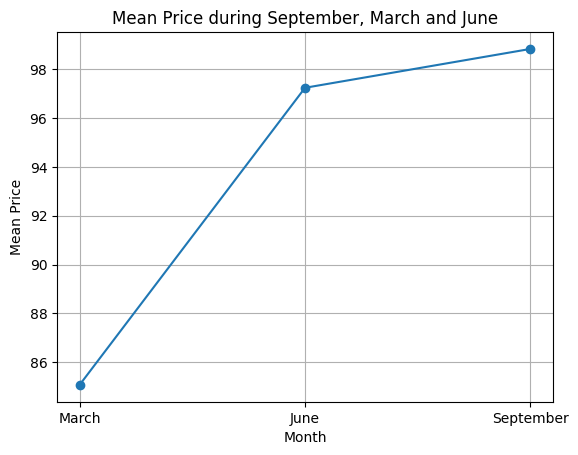

In [801]:
mean_new_price_feb = merged_df['new_price_feb'].mean()
mean_new_price_march = merged_df['new_price_march'].mean()
mean_new_price_april = merged_df['new_price_april'].mean()

mean_prices = pd.DataFrame({
    'Month': ['March', 'June','September', ],
    'Mean Price': [mean_new_price_feb, mean_new_price_march,mean_new_price_april]
})

plt.plot(mean_prices['Month'], mean_prices['Mean Price'], marker='o')
plt.title('Mean Price during September, March and June')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

#3o ερώτημα

Top 5 neighbourhoods with the most reviews:
neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              419634.0
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 200776.0
ΝΕΟΣ ΚΟΣΜΟΣ                         124626.0
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            100778.0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     99064.0
Name: number_of_reviews, dtype: float64


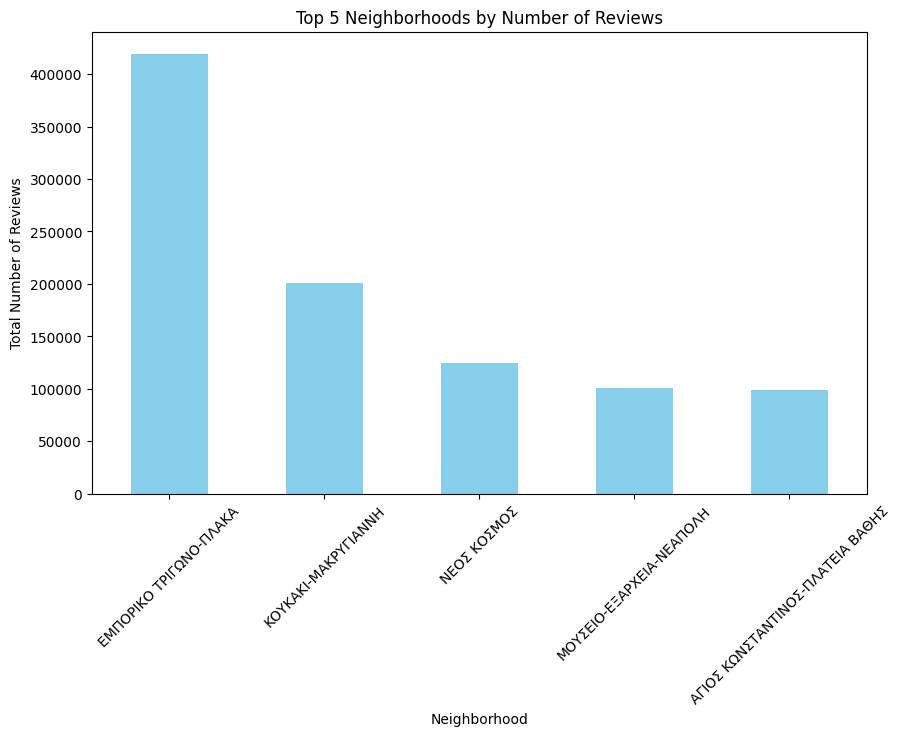

In [802]:
top_neighbourhoods = merged_df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(5)
print("Top 5 neighbourhoods with the most reviews:")
print(top_neighbourhoods)
plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighborhoods by Number of Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 4ο ερώτημα

In [803]:

most_frequent_neighbourhood = merged_df['neighbourhood'].value_counts().idxmax()
most_frequent_neighbourhood_count = merged_df['neighbourhood'].value_counts().max()

print("Η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων:", most_frequent_neighbourhood, "με", most_frequent_neighbourhood_count, "καταχωρήσεις.")

Η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων: ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ με 2616 καταχωρήσεις.


#5ο ερώτημα στο eclass δόθηκε η οδηγία ότι δεν χρειάζεται να κάνουμε και το 6ο ερώτημα εφόσον είναι η ίδια πληροφορία

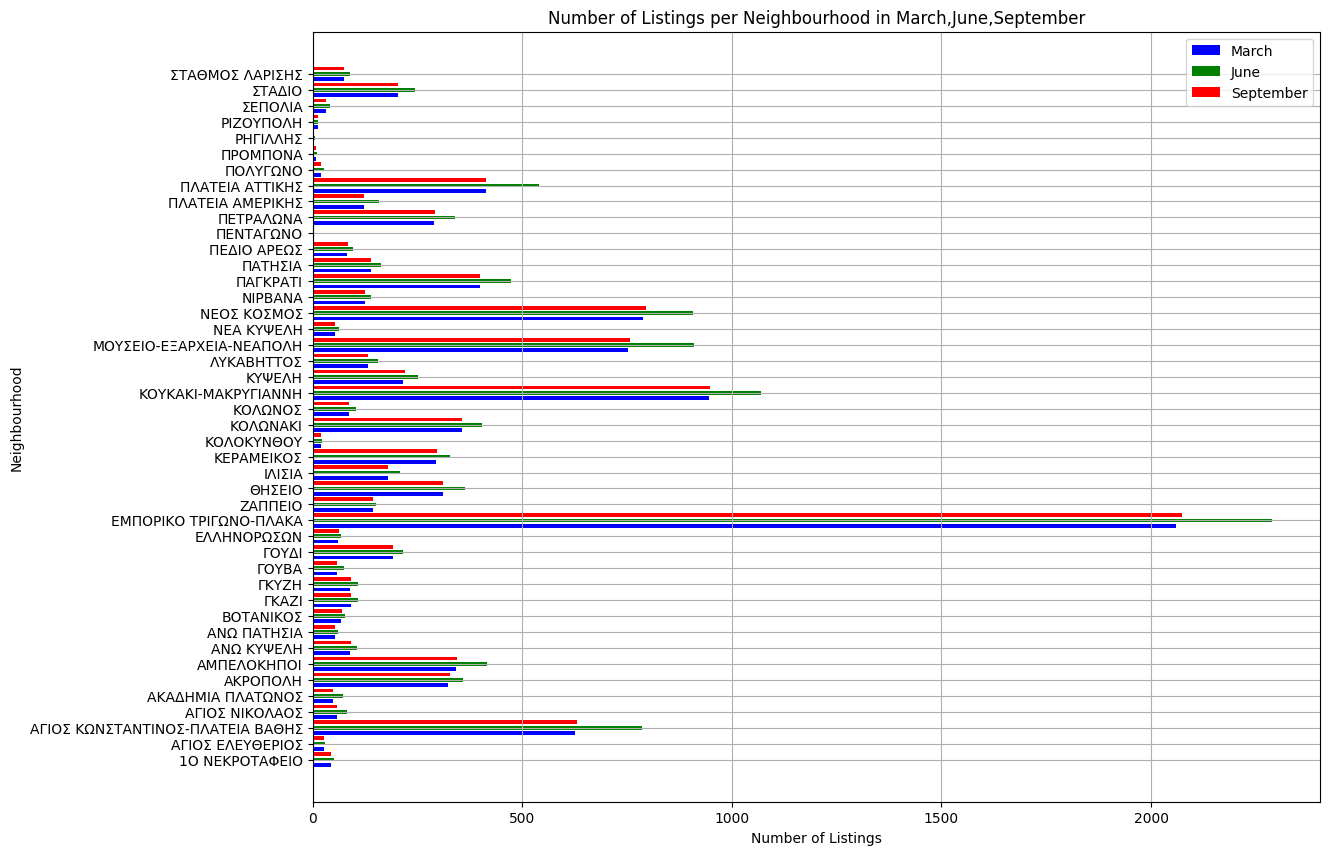

In [804]:
april_counts = merged_df[merged_df['new_price_april'].notna()].groupby('neighbourhood').size()
march_counts = merged_df[merged_df['new_price_march'].notna()].groupby('neighbourhood').size()
february_counts = merged_df[merged_df['new_price_feb'].notna()].groupby('neighbourhood').size()



import pandas as pd
import matplotlib.pyplot as plt


counts_df = pd.DataFrame({
    'September': april_counts,
    'June': march_counts,
    'March': february_counts
})

counts_df.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(13, 10))
neighbourhoods = counts_df.index
bar_width = 0.70


indices = np.arange(len(neighbourhoods))
february_indices = indices * 3
march_indices = february_indices + 1
april_indices = february_indices + 2

ax.barh(february_indices, counts_df['March'], height=bar_width, color='b', label='March')
ax.barh(march_indices, counts_df['June'], height=bar_width, color='g', label='June')
ax.barh(april_indices, counts_df['September'], height=bar_width, color='r', label='September')

ax.set(yticks=february_indices + 1, yticklabels=neighbourhoods, xlabel='Number of Listings', ylabel='Neighbourhood')
ax.set_title('Number of Listings per Neighbourhood in March,June,September')
ax.legend()

plt.grid(True)
plt.show()

#7ο ερώτημα
*1.7 Ποιος είναι ο πιο συχνός τύπος δωματίου (room_type) σε κάθε γειτονιά (neighborhood); *

In [805]:
most_common_room = merged_df.groupby('neighbourhood')['room_type'].agg(lambda x: x.value_counts().index[0])
print("Ο πιο συχνος τύπος δωματίου σε κάθε γειτονιά είναι \n",most_common_room)

Ο πιο συχνος τύπος δωματίου σε κάθε γειτονιά είναι 
 neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Entire home/apt
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    Entire home/apt
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    Entire home/apt
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      Entire home/apt
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   Entire home/apt
ΑΚΡΟΠΟΛΗ                            Entire home/apt
ΑΜΠΕΛΟΚΗΠΟΙ                         Entire home/apt
ΑΝΩ ΚΥΨΕΛΗ                          Entire home/apt
ΑΝΩ ΠΑΤΗΣΙΑ                         Entire home/apt
ΒΟΤΑΝΙΚΟΣ                           Entire home/apt
ΓΚΑΖΙ                               Entire home/apt
ΓΚΥΖΗ                               Entire home/apt
ΓΟΥΒΑ                               Entire home/apt
ΓΟΥΔΙ                               Entire home/apt
ΕΛΛΗΝΟΡΩΣΩΝ                         Entire home/apt
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Entire home/apt
ΖΑΠΠΕΙΟ                             Entire home/apt
ΘΗΣΕΙΟ                              Entire home/a

#8ο ερώτημα
*1.8 Ποιός είναι ο πιο ακριβός τύπος δωματίου; *

In [806]:
mean_price_per_room_type = merged_df.groupby('room_type')['price'].mean()


room_type_highest_mean_price = mean_price_per_room_type.idxmax()
highest_mean_price = mean_price_per_room_type.max()

print(f"Ο πιο ακριβός τύπος δωματίου είναι ο  {room_type_highest_mean_price} με μέση τιμή {highest_mean_price}.")

Ο πιο ακριβός τύπος δωματίου είναι ο  Hotel room με μέση τιμή 196.51908396946564.


#9ο ερώτημα
Στο eclass δοθηκε οδηγια να γινει το ερωτημα μονο για το 2019

#10ο ερώτημα
1.10 WORDCLOUD

In [807]:
areviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/september/reviews.csv")
reviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/march/reviews.csv")
mreviews_df= pd.read_csv("/content/gdrive/My Drive/tedemi/data/data/2023/june/reviews.csv")
areviews_df.drop('id', axis=1, inplace=True)
reviews_df.drop('id', axis=1, inplace=True)
mreviews_df.drop('id', axis=1, inplace=True)
aggregated_reviews = reviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')
merged_df.drop('listing_id', axis=1, inplace=True)
print(merged_df.head())

aggregated_reviews = mreviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')
merged_df.drop('listing_id', axis=1, inplace=True)

aggregated_reviews = areviews_df.drop_duplicates(subset='listing_id', keep='first')
merged_df = pd.merge(merged_df, aggregated_reviews, left_on='id', right_on='listing_id', how='left')

merged_df.drop('listing_id', axis=1, inplace=True)

      id  bedrooms  beds  review_scores_rating  number_of_reviews  \
0  10595         2     2                  4.83              121.0   
1  10990        -1    -1                  4.80              194.0   
2  10993        -1     0                  4.84              272.0   
3  10995        -1     0                  4.80               89.0   
4  27262        -1    -1                  4.81               61.0   

  neighbourhood                                                         name  \
0   ΑΜΠΕΛΟΚΗΠΟΙ      Condo in Athens · ★4.83 · 3 bedrooms · 5 beds · 2 baths   
1   ΑΜΠΕΛΟΚΗΠΟΙ   Rental unit in Athens · ★4.80 · 1 bedroom · 1 bed · 1 bath   
2   ΑΜΠΕΛΟΚΗΠΟΙ     Rental unit in Athens · ★4.84 · Studio · 2 beds · 1 bath   
3   ΑΜΠΕΛΟΚΗΠΟΙ  Rental unit in Athens · ★4.80 · 1 bedroom · 2 beds · 1 bath   
4   ΑΜΠΕΛΟΚΗΠΟΙ   Rental unit in Athens · ★4.81 · 1 bedroom · 1 bed · 1 bath   

   latitude  longitude last_review  ... availability_365 minimum_nights  \
0  37.98863   23.76527  2023-

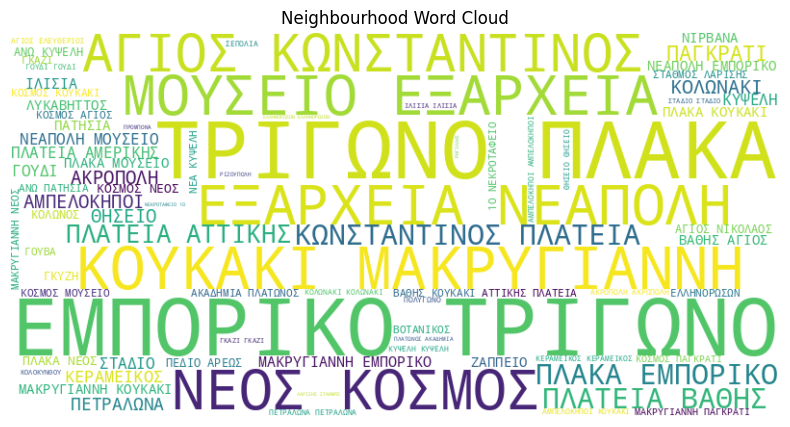

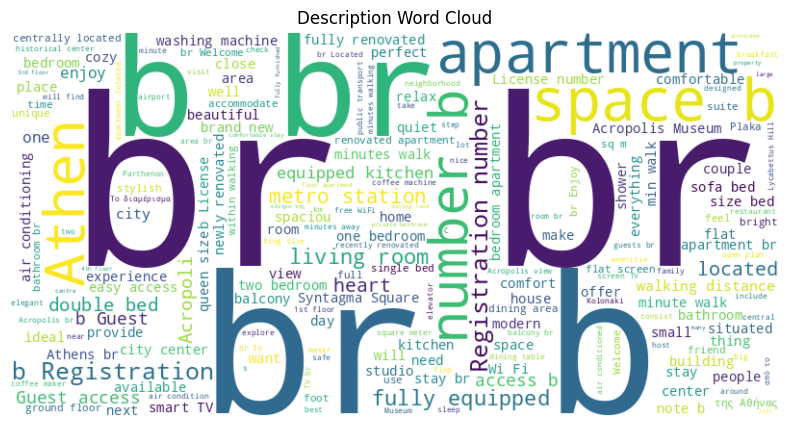

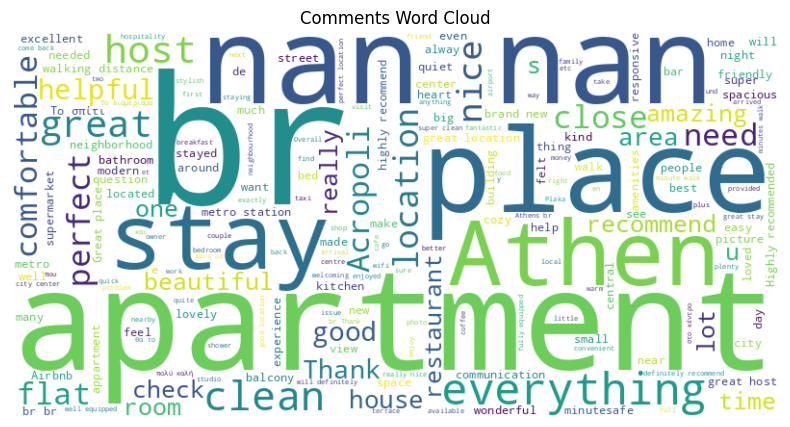

In [808]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(data, title):
    text = ' '.join(str(item) for item in data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(merged_df['neighbourhood'], 'Neighbourhood Word Cloud')
generate_wordcloud(merged_df['description'], 'Description Word Cloud')
generate_wordcloud(merged_df['comments'], 'Comments Word Cloud')

#1.11
Επειδη τα unique amenities > 2000 δοθηκε η οδηγια στο eclass να γινουν μονο για 1 ετος

#1.12 ερώτημα

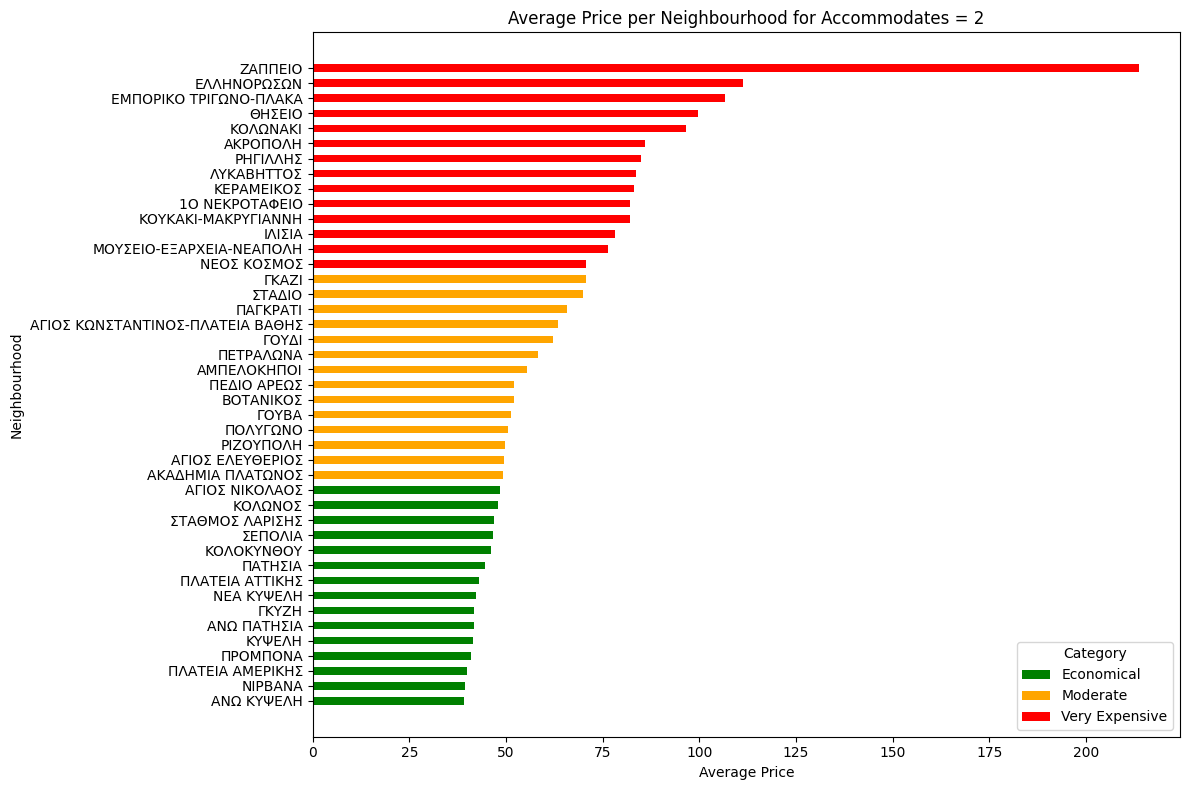

In [809]:
df = merged_df
filtered_df = df[df['accommodates'] == 2]


mean_prices = filtered_df.groupby('neighbourhood')['price'].mean().reset_index()


sorted_neighbourhoods = mean_prices.sort_values(by='price', ascending=True)


sorted_neighbourhoods['category'] = pd.qcut(sorted_neighbourhoods['price'], 3, labels=['Economical', 'Moderate', 'Very Expensive'])


color_map = {'Very Expensive': 'red', 'Moderate': 'orange', 'Economical': 'green'}
sorted_neighbourhoods['color'] = sorted_neighbourhoods['category'].map(color_map)


plt.figure(figsize=(12, 8))
bar_height = 0.5
space_between_bars = 0.3

for index, row in enumerate(sorted_neighbourhoods.itertuples(), 1):
    plt.barh(index, row.price, height=bar_height, color=row.color, label=row.category if row.category not in plt.gca().get_legend_handles_labels()[1] else "")

plt.yticks(range(1, len(sorted_neighbourhoods) + 1), sorted_neighbourhoods['neighbourhood'])
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.title('Average Price per Neighbourhood for Accommodates = 2')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

#1.13 ΕΡΩΤΗΜΑ ΤΑΞΙΝΟΜΗΣΗ ΤΩΝ 5 ΚΑΛΥΤΕΡΩΝ ΓΕΙΤΟΝΙΩΝ ΑΝΑΦΟΡΙΚΑ ΜΕ ΤΗ ΒΑΘΜΟΛΟΓΙΑ

In [810]:
top_5_neighborhoods = merged_df.groupby('neighbourhood')['review_scores_rating'].mean().nlargest(5)
print(top_5_neighborhoods)

neighbourhood
ΠΟΛΥΓΩΝΟ          4.882727
ΖΑΠΠΕΙΟ           4.825629
1Ο ΝΕΚΡΟΤΑΦΕΙΟ    4.811167
ΚΟΛΟΚΥΝΘΟΥ        4.800435
ΑΚΡΟΠΟΛΗ          4.797525
Name: review_scores_rating, dtype: float64


#ΕΡΩΤΗΜΑ ΓΕΙΤΟΝΙΕΣ ΠΙΟ ΚΟΝΤΑ ΣΤΟ ΑΕΡΟΔΡΟΜΙΟ

In [811]:
from geopy.distance import geodesic

df = merged_df
airport_coords = (37.9362, 23.9481)
df['distance'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), airport_coords).kilometers, axis=1)


sorted_df = df.sort_values(by='distance')


closest_listings = sorted_df.head(10)


for i, row in closest_listings.iterrows():
    print(f"{i + 1}. {row['neighbourhood']} - Distance: {row['distance']:.2f} km")

2691. ΠΕΝΤΑΓΩΝΟ - Distance: 16.22 km
5884. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.28 km
5142. ΓΟΥΔΙ - Distance: 16.32 km
5885. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.33 km
1808. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.34 km
368. ΠΕΝΤΑΓΩΝΟ - Distance: 16.35 km
2692. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.35 km
8819. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.38 km
8336. ΓΟΥΔΙ - Distance: 16.42 km
12626. ΕΛΛΗΝΟΡΩΣΩΝ - Distance: 16.43 km


#ΕΥΡΕΣΗ ΤΙΜΩΝ ΓΕΙΤΟΝΙΩΝ ΠΟΥ ΕΙΝΑΙ ΠΙΟ ΚΟΝΤΑ ΣΤΗΝ ΑΚΡΟΠΟΛΗ

In [812]:
from geopy.distance import geodesic


airport_coords = (37.9715, 23.7257)
df = merged_df.copy()
df = df[df['accommodates'] == 2]
df['distance'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), airport_coords).kilometers, axis=1)


sorted_df = df.sort_values(by='distance')


closest_listings = sorted_df.head(10)

for i, row in closest_listings.iterrows():
    print(f"{i + 1}. {row['price']} {row['neighbourhood']} - Distance: {row['distance']:.2f} km")

237. 61.0 ΑΚΡΟΠΟΛΗ - Distance: 0.10 km
8371. 194.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.22 km
8370. 170.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.22 km
3724. 54.0 ΑΚΡΟΠΟΛΗ - Distance: 0.22 km
4437. 65.0 ΑΚΡΟΠΟΛΗ - Distance: 0.23 km
6348. 105.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.25 km
6350. 90.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.25 km
6354. 80.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.25 km
6351. 90.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.25 km
6178. 115.0 ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ - Distance: 0.25 km


#14ο ερώτημα

In [813]:
host_listings_count = merged_df['host_id'].value_counts()

df = pd.DataFrame({'host_id': host_listings_count.index, 'num_host_listings': host_listings_count.values})

df = df.sort_values(by='num_host_listings', ascending=False)


top_10_hosts = df.head(10)

print(top_10_hosts)

       host_id  num_host_listings
0   20104194.0                116
1   29927830.0                115
2  113548208.0                 90
3   90390850.0                 89
4     748818.0                 74
5  182156346.0                 68
6    2089542.0                 62
7  113353393.0                 60
8  123074489.0                 58
9   47267002.0                 56


In [814]:
df2023= merged_df

In [815]:
dfA = df2019
dfB = df2023

In [816]:
df_saved = df2019

In [817]:
df2019_filtered = df_saved[df_saved['minimum_nights'] <= 40]
df2023_filtered = df2023[df2023['minimum_nights'] <= 40]
unique_neighborhoods_2019 = df2019_filtered['neighbourhood'].nunique()
unique_neighborhoods_2023 = df2023_filtered['neighbourhood'].nunique()
print(f"Γειτονιές 2019: {unique_neighborhoods_2019}")
print(f"Γειτονιές 2023: {unique_neighborhoods_2023}")

mean_price_2019 = df2019_filtered['price'].mean()


mean_price_2023 = df2023_filtered['price'].mean()


print(f"Mean price in 2019: ${mean_price_2019:.2f}")
print(f"Mean price in 2023: ${mean_price_2023:.2f}")


top_10_neighbourhoods_2019 = df2019_filtered.groupby('neighbourhood')['price'].mean().nlargest(10).index


top_10_prices_2019 = df2019_filtered[df2019_filtered['neighbourhood'].isin(top_10_neighbourhoods_2019)].groupby('neighbourhood')['price'].mean()

top_10_prices_2023 = df2023_filtered[df2023_filtered['neighbourhood'].isin(top_10_neighbourhoods_2019)].groupby('neighbourhood')['price'].mean()


comparison = pd.DataFrame({
    'price_2019': top_10_prices_2019,
    'price_2023': top_10_prices_2023
})


print(comparison)

Γειτονιές 2019: 44
Γειτονιές 2023: 44
Mean price in 2019: $63.86
Mean price in 2023: $95.15
                        price_2019  price_2023
neighbourhood                                 
ΑΚΡΟΠΟΛΗ                 89.795322  136.455882
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ   87.563536  130.006116
ΖΑΠΠΕΙΟ                  75.890756  169.544910
ΘΗΣΕΙΟ                   77.385621  117.097619
ΚΕΡΑΜΕΙΚΟΣ               62.887446  110.406593
ΚΟΛΩΝΑΚΙ                 78.348774  128.186404
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ      88.059925  116.858436
ΛΥΚΑΒΗΤΤΟΣ               76.210526  104.741758
ΝΕΟΣ ΚΟΣΜΟΣ              64.011765   85.880486
ΡΗΓΙΛΛΗΣ                 85.142857  104.125000


Με βάση όλες τις απαντήσεις και παρατηρώντας τα γραφήματα μπορούμε να παρατηρήσουμε ότι οι τιμές αυξήθηκαν για τις βραχυχρόνιες μισθώσεις και οι ακριβές γειτονιές παρέμειναν ακριβές και αυξήθηκαν οι τιμές τους. παράλληλα ο αριθμός των γειτονιών δεν διαφέρει.

# 2Ο ΜΈΡΟΣ ΕΡΓΑΣΙΑΣ
Στο δεύτερο μέρος δόθηκε οδηγία να το κάνουμε είτε για το 5% των δεδομένων του 2019 + 2023 ή μόνο για ένα έτος ώστε να είναι διαχειρίσιμο εγώ διαλέγω να το κάνω μόνο για ένα έτος

In [818]:
df2019 = df2019[['id','description','name']]
df2023 = df2023[['id','description','name']]

In [820]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [821]:
dfa = df2019
dfb = df2023

In [837]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words and not re.search(r'\d', word) and word!="br" and word!="b" and word!="</b>" and word!="<br />"]
    return ' '.join(filtered_text)

def remove_punctuation(text):
    extended_punctuation = string.punctuation + '”“’‘—–'
    translator = str.maketrans('', '', extended_punctuation)
    return text.translate(translator)
def remove_non_english_chars(text):
    return re.sub(r'[^\x00-\x7F]+', ' ', text)
def clean_description(text):
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text = remove_non_english_chars(text)
    return text
df2023 = dfb
df2019 = dfa
df2023.loc[:, 'description'] = df2023['description'].apply(clean_description)

df2019.loc[:, 'description'] = df2019['description'].apply(clean_description)
df2023.loc[:, 'name'] = df2023['name'].apply(clean_description)

df2019.loc[:, 'name'] = df2019['name'].apply(clean_description)


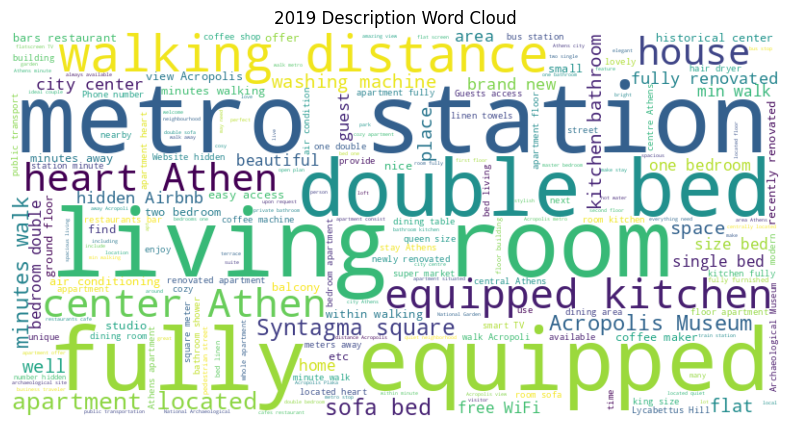

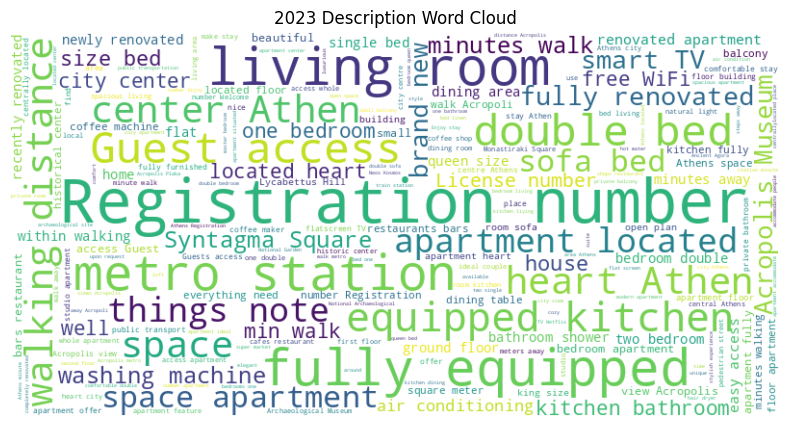

In [838]:
generate_wordcloud(df2019['description'], '2019 Description Word Cloud')
generate_wordcloud(df2023['description'], '2023 Description Word Cloud')

In [825]:
dfa = df2019
dfb = df2023

In [832]:
df2023 = dfb.copy()
df2019 = dfa.copy()

df2023['combined'] = df2023['name'].astype(str) + df2023['description'].astype(str)
df2019['combined'] = df2019['name'].astype(str) + df2019['description'].astype(str)


In [833]:
dfa1 = df2019
dfb1 = df2023

In [835]:
df2023['combined'].head()

0                                                                                                                               Condo Athens     bedrooms   beds   bathsapartment apartment floor    bedroom  double bed aircondition    bedroom  single beds aircondition    bedroom  single beds aircondition    Living room  sofa beds aircondition       Fast free internet    Central heating day around c                                              President         space  b     apartment apartment floor    bedroom  double bed aircondition    bedroom  single beds aircondition    bedroom  single beds aircondition    Living room  sofa beds aircondition       Fast free internet    Central heating day around c       minutes away Metro Blue line direct line come
1                                                                                 Rental unit Athens     bedroom   bed   bathAthens Quality Apartments  Deluxe apartment apartment  square meters     excellent located    close metro station  

In [836]:
merged_df['description'].head(1)

0    The apartment is 3-bedroom apartment with 2-bathrooms on the 2nd floor.<br />1st bedroom - double bed with air-condition.<br />2nd bedroom - 2 single beds with air-condition<br />3rd bedroom - 2 single beds with air-condition<br />Living room - 2 sofa beds with air-condition<br /><br />Fast free internet up to 100mbps<br />Central heating on all day at around 21 c<br /><br />10 λεπτά από το μετρό Πανόρμου και 100 μέτρα απο στάση λεωφορείου.<br />Το διαμέρισμα είναι 100 μέτρα μακριά απο το Ξενοδοχείο President.<br /><br /><b>The space</b><br />The apartment is 3-bedroom apartment with 2-bathrooms on the 2nd floor.<br />1st bedroom - double bed with air-condition.<br />2nd bedroom - 2 single beds with air-condition<br />3rd bedroom - 2 single beds with air-condition<br />Living room - 2 sofa beds with air-condition<br /><br />Fast free internet up to 100mbps<br />Central heating on all day at around 21 c<br /><br />10 minutes away from the Metro Blue line which is the direct line to

#2.1

In [842]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


df = df2019
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['combined'])
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(tfidf_df.head())

   aade  aade registry  aathens  aathens apartment   ab  ab american  \
0   0.0            0.0      0.0                0.0  0.0          0.0   
1   0.0            0.0      0.0                0.0  0.0          0.0   
2   0.0            0.0      0.0                0.0  0.0          0.0   
3   0.0            0.0      0.0                0.0  0.0          0.0   
4   0.0            0.0      0.0                0.0  0.0          0.0   

   ab athen  ab based  ab basilopoulos  ab dem  ...  zus tlichen   zv  zv en  \
0       0.0       0.0              0.0     0.0  ...          0.0  0.0    0.0   
1       0.0       0.0              0.0     0.0  ...          0.0  0.0    0.0   
2       0.0       0.0              0.0     0.0  ...          0.0  0.0    0.0   
3       0.0       0.0              0.0     0.0  ...          0.0  0.0    0.0   
4       0.0       0.0              0.0     0.0  ...          0.0  0.0    0.0   

   zwar  zwar ruhig  zwei  zwei person  zwei personen  zwiedzi  zwiedzi metro  
0   0.

#2.2

In [846]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)
cos_sim_df = pd.DataFrame(cosine_sim_matrix, index=df2019.index, columns=df2019.index)

flat_cos_sim = cos_sim_df.where(np.triu(np.ones(cos_sim_df.shape), k=1).astype(bool)).stack()
top100_pairs = flat_cos_sim.sort_values(ascending=False).head(100)
print(top100_pairs)

6055  7864    1.0
7729  7735    1.0
9242  9292    1.0
3878  4189    1.0
7870  7912    1.0
4120  4121    1.0
3851  3878    1.0
7912  7913    1.0
3851  4189    1.0
7870  7913    1.0
7790  7793    1.0
7862  8287    1.0
7642  8065    1.0
7643  8066    1.0
7165  7183    1.0
6732  6899    1.0
9094  9097    1.0
9220  9222    1.0
9094  9096    1.0
9220  9223    1.0
935   9478    1.0
7595  7695    1.0
9221  9222    1.0
7595  7679    1.0
4145  4146    1.0
7165  7180    1.0
4147  4149    1.0
7165  7170    1.0
9222  9223    1.0
9096  9097    1.0
7146  7180    1.0
      7183    1.0
3861  3862    1.0
3545  7659    1.0
4149  4150    1.0
3545  5330    1.0
4147  4150    1.0
7165  7177    1.0
7401  7409    1.0
3853  3862    1.0
      3861    1.0
5687  7985    1.0
2724  2725    1.0
7180  7183    1.0
6899  6900    1.0
      6901    1.0
7177  7183    1.0
      7180    1.0
7176  8475    1.0
4199  4996    1.0
9172  9173    1.0
4204  5002    1.0
6900  6901    1.0
6849  6851    1.0
5223  5224    1.0
7170  7183

In [848]:
for rank, ((item1, item2), similarity) in enumerate(top100_pairs.items(), 1):
    print(f"{rank}. {item1} - {item2}: {similarity}")

1. 6055 - 7864: 1.0000000000000009
2. 7729 - 7735: 1.0000000000000009
3. 9242 - 9292: 1.0000000000000004
4. 3878 - 4189: 1.0000000000000004
5. 7870 - 7912: 1.0000000000000004
6. 4120 - 4121: 1.0000000000000004
7. 3851 - 3878: 1.0000000000000004
8. 7912 - 7913: 1.0000000000000004
9. 3851 - 4189: 1.0000000000000004
10. 7870 - 7913: 1.0000000000000004
11. 7790 - 7793: 1.0000000000000004
12. 7862 - 8287: 1.0000000000000004
13. 7642 - 8065: 1.0000000000000004
14. 7643 - 8066: 1.0000000000000004
15. 7165 - 7183: 1.0000000000000002
16. 6732 - 6899: 1.0000000000000002
17. 9094 - 9097: 1.0000000000000002
18. 9220 - 9222: 1.0000000000000002
19. 9094 - 9096: 1.0000000000000002
20. 9220 - 9223: 1.0000000000000002
21. 935 - 9478: 1.0000000000000002
22. 7595 - 7695: 1.0000000000000002
23. 9221 - 9222: 1.0000000000000002
24. 7595 - 7679: 1.0000000000000002
25. 4145 - 4146: 1.0000000000000002
26. 7165 - 7180: 1.0000000000000002
27. 4147 - 4149: 1.0000000000000002
28. 7165 - 7170: 1.0000000000000002
29

#2.3

In [849]:
def recommend(item_id, num):
    idx = df2019.index[df2019['id'] == item_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]
    property_indices = [i[0] for i in sim_scores]

    print(f'Recommending {num} listings similar to {df2019.loc[df2019["id"] == item_id, "name"].iloc[0]}')
    description = df2019.loc[df2019['id'] == item_id, 'description'].iloc[0]
    print(f"Description for item ID {item_id}: {description}")
    print('-' * 60)
    for i, idx in enumerate(property_indices):
        name = df2019.iloc[idx]['name']
        description = df2019.iloc[idx]['description']
        score = sim_scores[i][1]
        print(f'Recommended: {name}')
        print(f'Description: {description}')
        print(f'(score {score:.3f})\n')

recommend(item_id=10595, num=5)


Recommending 5 listings similar to Metro WIFI etc
Description for item ID 10595: Athens Furnished Apartment apartment excellent located close metro station lovely clean facilities need nice balcony excellent WiFi cable tv fully air conditioned Athens Furnished Apartment excellent located close metro lovely clean apartment facilities need balcony floor worry elevator building Fully equipped kitchen everything need prepare lunchdinner Living room relax enjoy movie sport event Clean nice bathrooms people sofabed Apartment everything need Bedroom Double bed Bedroom single beds Bedroom single beds Telephone line incoming calls call us need something Free fast WiFi best internet provider Greece share con
------------------------------------------------------------
Recommended: Metro WIFI cableTV
Description: Athens Furnished Apartment apartment square meters excellent located close metro station lovely clean facilities need nice balcony excellent WiFi cable tv fully air conditioned Athens Fu

In [855]:
import nltk
import pandas as pd
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

df2019.loc[:, 'combined'] = df2019['combined'].str.replace('-', ' ', regex=False)

tokens = [word for desc in df2019['combined'] for word in nltk.word_tokenize(desc)]
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(3)
top_10_common_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 10)
print(top_10_common_bigrams)

[('living', 'room'), ('fully', 'equipped'), ('metro', 'station'), ('double', 'bed'), ('walking', 'distance'), ('heart', 'Athens'), ('equipped', 'kitchen'), ('center', 'Athens'), ('apartment', 'located'), ('minutes', 'walk')]
